# INTRODUCTION

## Overview
In this project, we will be analysing the Kings county housing dataset
Our objective is to use linear regression techniques to develop a model which can be used to predict the price of a home not already described in our original data set, based on the input of other data related to the house. 

I am also interested in exploring the variation of housing prices across georgraphic regions within Kings county, to see if any patterns can be identified. 

Kings count is a county in Washington state. The western portion of it encompasses the city of Seattle. The data set contains sale information related to specific houes. It has around 21,000 records. 


# OBTAIN

## Importing libraries and dataset
First off, lets import the modules we will require for this analysis, as well as the dataset itself. df0 will be our clean, unmodified dataset. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import statsmodels.api as sm
import warnings; warnings.simplefilter('ignore')
from math import sqrt

pd.options.display.float_format = '{:,.2f}'.format
mpl.rcParams['figure.figsize'] = (20,20)

   
df0 = pd.read_csv('kc_house_data.csv')   

## Preliminary Overview
Lets get an overview of our dataset with standard python methods. 

In [2]:
display(df0.head())
display(df0.describe())
print(type(df0.info()))

id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014 221,900.00         3       1.00         1180   
1  6414100192   12/9/2014 538,000.00         3       2.25         2570   
2  5631500400   2/25/2015 180,000.00         2       1.00          770   
3  2487200875   12/9/2014 604,000.00         4       3.00         1960   
4  1954400510   2/18/2015 510,000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650    1.00         nan  0.00  ...      7        1180            0.0   
1      7242    2.00        0.00  0.00  ...      7        2170          400.0   
2     10000    1.00        0.00  0.00  ...      6         770            0.0   
3      5000    1.00        0.00  0.00  ...      7        1050          910.0   
4      8080    1.00        0.00  0.00  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  
0     1955          0.00    98178 47.51 -122.26           1340        5650  
1     1951      1,991.00    98125 47.72 -122.32           1690        7639  
2     1933           nan    98028 47.74 -122.23           2720        8062  
3     1965          0.00    98136 47.52 -122.39           1360        5000  
4     1987          0.00    98074 47.62 -122.05           1800        7503  

[5 rows x 21 columns]

id        price  bedrooms  bathrooms  sqft_living  \
count        21,597.00    21,597.00 21,597.00  21,597.00    21,597.00   
mean  4,580,474,287.77   540,296.57      3.37       2.12     2,080.32   
std   2,876,735,715.75   367,368.14      0.93       0.77       918.11   
min       1,000,102.00    78,000.00      1.00       0.50       370.00   
25%   2,123,049,175.00   322,000.00      3.00       1.75     1,430.00   
50%   3,904,930,410.00   450,000.00      3.00       2.25     1,910.00   
75%   7,308,900,490.00   645,000.00      4.00       2.50     2,550.00   
max   9,900,000,190.00 7,700,000.00     33.00       8.00    13,540.00   

          sqft_lot    floors  waterfront      view  condition     grade  \
count    21,597.00 21,597.00   19,221.00 21,534.00  21,597.00 21,597.00   
mean     15,099.41      1.49        0.01      0.23       3.41      7.66   
std      41,412.64      0.54        0.09      0.77       0.65      1.17   
min         520.00      1.00        0.00      0.00       1.00      3.00   
25%       5,040.00      1.00        0.00      0.00       3.00      7.00   
50%       7,618.00      1.50        0.00      0.00       3.00      7.00   
75%      10,685.00      2.00        0.00      0.00       4.00      8.00   
max   1,651,359.00      3.50        1.00      4.00       5.00     13.00   

       sqft_above  yr_built  yr_renovated   zipcode       lat      long  \
count   21,597.00 21,597.00     17,755.00 21,597.00 21,597.00 21,597.00   
mean     1,788.60  1,971.00         83.64 98,077.95     47.56   -122.21   
std        827.76     29.38        399.95     53.51      0.14      0.14   
min        370.00  1,900.00          0.00 98,001.00     47.16   -122.52   
25%      1,190.00  1,951.00          0.00 98,033.00     47.47   -122.33   
50%      1,560.00  1,975.00          0.00 98,065.00     47.57   -122.23   
75%      2,210.00  1,997.00          0.00 98,118.00     47.68   -122.12   
max      9,410.00  2,015.00      2,015.00 98,199.00     47.78   -121.31   

       sqft_living15  sqft_lot15  
count      21,597.00   21,597.00  
mean        1,986.62   12,758.28  
std           685.23   27,274.44  
min           399.00      651.00  
25%         1,490.00    5,100.00  
50%         1,840.00    7,620.00  
75%         2,360.00   10,083.00  
max         6,210.00  871,200.00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
<class 'None

## Value Counts Report
Lets gather some more information about our data set. The function below takes the dataset and returns a dataframe with the following information for each column:

1. The data type of the columns
2. The missing values in the column, expressed as a percentage of the total records. 
3. The number of unique values in the column
4. The most common value in column
5. The percentage of the column's values equal to the most common value in that column
6. The second, third...nth most common values and the percentage of the column that consists of them

In [3]:
def report1 (dataframe,n_highest_counts):
    ''' Returns a dataframe reporting on the value counts of input frame. '''
    
    master={}
        
    for column in dataframe.columns:
        
        master[column]={}
        col_dict = master[column]
        col_dict['type'] = str(dataframe[column].dtypes)
        col_dict['% empty'] = round(((len(dataframe)-dataframe[column].count())/len(dataframe))*100,2)
        col_dict['unique values'] = dataframe[column].nunique()
        
        x = 1
        series1 = dataframe[column].value_counts().head(n_highest_counts)
        series1 = round((series1/len(dataframe)) * 100, 2)        
        
        for index,item in series1.items():
            value_prop = str(x) + 'nth_value_%'
            value_name = str(x) + 'nth_value'
            col_dict[value_name] = index
            col_dict[value_prop] = item
            x += 1
        
    df_report=pd.DataFrame.from_dict(master,orient='index')
    df_report.sort_values(['1nth_value_%'],ascending=False,inplace=True)
        
    return df_report

df_report = report1(df0,10)
display(df_report)

type  % empty  unique values 1nth_value  1nth_value_%  \
view           float64     0.29              5       0.00         89.93   
waterfront     float64    11.00              2       0.00         88.32   
yr_renovated   float64    17.79             70       0.00         78.77   
condition        int64     0.00              5          3         64.92   
sqft_basement   object     0.00            304        0.0         59.39   
floors         float64     0.00              6       1.00         49.42   
bedrooms         int64     0.00             12          3         45.49   
grade            int64     0.00             11          7         41.55   
bathrooms      float64     0.00             29       2.50         24.90   
zipcode          int64     0.00             70      98103          2.79   
yr_built         int64     0.00            116       2014          2.59   
sqft_lot15       int64     0.00           8682       5000          1.98   
sqft_lot         int64     0.00           9776       5000          1.66   
sqft_above       int64     0.00            942       1300          0.98   
sqft_living15    int64     0.00            777       1540          0.91   
price          float64     0.00           3622 350,000.00          0.80   
date            object     0.00            372  6/23/2014          0.66   
sqft_living      int64     0.00           1034       1300          0.64   
long           float64     0.00            751    -122.29          0.53   
lat            float64     0.00           5033      47.66          0.08   
id               int64     0.00          21420  795000620          0.01   

               2nth_value  2nth_value_%  3nth_value  3nth_value_%  4nth_value  \
view                 2.00          4.43        3.00          2.35        1.00   
waterfront           1.00          0.68         NaN           nan         NaN   
yr_renovated     2,014.00          0.34    2,003.00          0.14    2,013.00   
condition               4         26.29           5          7.88           2   
sqft_basement           ?          2.10       600.0          1.00       500.0   
floors               2.00         38.13        1.50          8.84        3.00   
bedrooms                4         31.87           2         12.78           5   
grade                   8         28.08           9         12.11           6   
bathrooms            1.00         17.83        1.75         14.11        2.25   
zipcode             98038          2.73       98115          2.70       98052   
yr_built             2006          2.10        2005          2.08        2004   
sqft_lot15           4000          1.65        6000          1.33        7200   
sqft_lot             6000          1.34        4000          1.16        7200   
sqft_above           1010          0.97        1200          0.95        1220   
sqft_living15        1440          0.90        1560          0.89        1500   
price          450,000.00          0.80  550,000.00          0.74  500,000.00   
date            6/25/2014          0.61   6/26/2014          0.61    7/8/2014   
sqft_living          1400          0.63        1440          0.62        1660   
long              -122.30          0.51     -122.36          0.48     -122.29   
lat                 47.55          0.08       47.53          0.08       47.68   
id             1825069031          0.01  2019200220          0.01  7129304540   

               ...  6nth_value 6nth_value_%  7nth_value 7nth_value_%  \
view           ...         NaN          nan         NaN          nan   
waterfront     ...         NaN          nan         NaN          nan   
yr_renovated   ...    2,000.00         0.13    2,005.00         0.13   
condition      ...         NaN          nan         NaN          nan   
sqft_basement  ...       800.0         0.93       400.0         0.85   
floors         ...        3.50         0.03         NaN          nan   
bedrooms       ...           1         0.91           7         0.18   
grade   

# SCRUB
Lets clean our dataset and get rid of useless fluff. To keep track of how much of the original data is left over, let us define a function which we can call after each step in the cleaning process to make sure we arent getting rid of too much data. This function will tell us what percent of the number of rows in the original dataframe still remain in our cleaned and modified dataframe

In [4]:
def row_loss(df_base,df_current):
    ''' Returns list describing difference in row counts between two input frames'''
    
    rows_dropped = len(df_base) - len(df_current)
    rows_left = len(df_current)
    row_loss_perc = ((len(df_base) - rows_dropped)/len(df_base)) * 100
    row_loss_perc = round(row_loss_perc,2)
    
    metrics = [rows_dropped,rows_left,row_loss_perc]
    
    return metrics

def loss_report (df_base,df_current):
    ''' Prints row loss report '''
    stats_list = row_loss(df_base,df_current)
    
    for x in stats_list:
        x = str(x)
      
    string = "Rows Dropped: {}    Rows Left: {}   Percentage Remaining: {}".format(stats_list[0],stats_list[1],stats_list[2])
    
    print(string)
    

## PHASE 1 - Permanent Modifictions. 
In this phase of the scrubbing process, we will recast data types, deal with duplicate values, missing values and placeholders. These are modification to the dataset that must be made in any scenario, and we probably wont need to tweak these at any point. The end result of phase one will be dataframe that we will process further, but will serve as a stable base for us to try different processing techniques down the line. 

Lets create two list: a primary_removals list which will contain features we definitely want to drop, and a secondary_removals list where we will add features we may want to drop after our first model. Will will gather the column names in these lists as we go, and at the end wil will creat a dataframe (df1) that reflects the changes made in phase one. 

In [5]:
primary_removals = []
secondary_removals = []

df1 = df0.copy()

### Recasting Data Types
We now take a closer look at which columns have a datatype of 'object', and whether we may turn them into numbers. 

In [6]:
df_objects = list(df_report[df_report['type'] == 'object'].index)
display(df_objects)

['sqft_basement', 'date']

Lets turn these into more appropriate data types.

In [7]:
df1['date'] = pd.to_datetime(df1['date'])
#df1['sqft_basement'] = pd.to_numeric(df1['sqft_basement'])

I commented out the line to recast sqft_basement. Turns out it has some problematic values in it. Lets hold off for now, and revisit later. 

As for the 'date' column, on second thought, lets drop it. We need to convert all our data into numeric form. We could conceivably do this with the date column but it would require some engineering. But if we think about it, the date column is probably not very useful to us in this case. It describes the date that the house in question was sold. I dont really see how this can have any significant effect on the price of a house. Lets at least drop it for now and perhaps we can retrain our model with a modified version of it later to see if it makes any difference. 

In [8]:
df1 = df1.sort_values('date',ascending=True)
df1 = df1.drop(['date'],axis=1)

### Duplicate Records

We would like to assume that each row in the dataset refers to just one house. The 'id' column is described as being the unique identifier for a house. However, even though the dataset is 21597 records long, 'id' has 21420 unique values, and no missing values. This might indicate the existence of duplicates. 

The function below returns a list of id's that occur more than once in the dataframe. We will use this list to filter the dataframe to find all rows with those id numbers and sort them by id number so we can observe the rows with the same Id numbers one on top of the other. If we see that the rest of the data in both rows with the same ID is also the same, we can confirm that these are true duplicates. 

In [9]:
def duplicates_list (dataframe,column):
    '''Returns list of index labels of duplicate column values'''
    
    df_id_Counts = dataframe[column].value_counts()
    repeats = df_id_Counts[df_id_Counts > 1]
    repeats = list(repeats.index)
    
    return repeats

repeated_values = duplicates_list(df1,'id')

df_dups = df1[df1['id'].isin(repeated_values)]
df_dups.sort_values(by='id',inplace=True)

dups_count = len(df_dups) - len(repeated_values)
percent_of_duplicates = dups_count/len(df1) 
percent_of_duplicates = round(percent_of_duplicates *100,2)
                         
print("{} ( {}% ) of the rows in the dataframe are duplicate records".format(dups_count,percent_of_duplicates))
display(df_dups.head(10))


177 ( 0.82% ) of the rows in the dataframe are duplicate records


id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
2495     1000102 300,000.00         6       3.00         2400      9373   
2494     1000102 280,000.00         6       3.00         2400      9373   
16800    7200179 150,000.00         2       1.00          840     12750   
16801    7200179 175,000.00         2       1.00          840     12750   
11421  109200390 245,000.00         3       1.75         1480      3900   
11422  109200390 250,000.00         3       1.75         1480      3900   
12406  123039336 244,900.00         1       1.00          620      8261   
12405  123039336 148,000.00         1       1.00          620      8261   
7785   251300110 225,000.00         3       2.25         2510     12013   
7786   251300110 358,000.00         3       2.25         2510     12013   

       floors  waterfront  view  condition  grade  sqft_above sqft_basement  \
2495     2.00        0.00  0.00          3      7        2400           0.0   
2494     2.00         nan  0.00          3      7        2400           0.0   
16800    1.00        0.00  0.00          3      6         840           0.0   
16801    1.00        0.00  0.00          3      6         840           0.0   
11421    1.00        0.00  0.00          4      7        1480           0.0   
11422    1.00        0.00  0.00          4      7        1480           0.0   
12406    1.00        0.00  0.00          3      5         620           0.0   
12405    1.00        0.00  0.00          3      5         620           0.0   
7785     2.00        0.00  0.00          3      8        2510           0.0   
7786     2.00        0.00  0.00          3      8        2510           0.0   

       yr_built  yr_renovated  zipcode   lat    long  sqft_living15  \
2495       1991          0.00    98002 47.33 -122.21           2060   
2494       1991          0.00    98002 47.33 -122.21           2060   
16800      1925          0.00    98055 47.48 -122.21           1480   
16801      1925           nan    98055 47.48 -122.21           1480   
11421      1980          0.00    98023 47.30 -122.37           1830   
11422      1980          0.00    98023 47.30 -122.37           1830   
12406      1939           nan    98106 47.51 -122.36           1180   
12405      1939          0.00    98106 47.51 -122.36           1180   
7785       1988          0.00    98003 47.35 -122.31           1870   
7786       1988          0.00    98003 47.35 -122.31           1870   

       sqft_lot15  
2495         7316  
2494         7316  
16800        6969  
16801        6969  
11421        6956  
11422        6956  
12406        8244  
12405        8244  
7785         8017  
7786         8017

As we can see, the duplicate ids refer to the same houses as they refer to houses with the same number of bedrooms, bathrooms, square footage etc. Given that only 0.82% of the rows of the dataset, we can safely discard them. Once we have done that, lets set the id number as the index of the dataframe, since now it truly is a unique identifier. This should help us with merges later on and maintain the integrity of our data. Lets also take a look at where our row loss metric stands


In [10]:
df1 = df1.drop_duplicates('id')
df1.set_index('id',inplace=True)

print(loss_report(df0,df1))

Rows Dropped: 177    Rows Left: 21420   Percentage Remaining: 99.18
None


### Placeholders and Missing Values

Finding missing values is simple enough: we can use native python methods to examine the null values in a given dataframe or series. But as we know, oftentimes datasets have palceholder values that are actually null values, although not encoded as such. Finding these is trickier. One way is to look at the counts of unique values in each dataframe column to see if anything jumps out.

Forunately, our custom df_report which we got from our report1 function will come in handy to find out if any particular values constitute and abormally large proportion of a gievn dataframe column. This could be an indication that there is a placeholder value that will skew our results. 

Lets take a look at the report again. 

In [11]:
display(df_report)     

type  % empty  unique values 1nth_value  1nth_value_%  \
view           float64     0.29              5       0.00         89.93   
waterfront     float64    11.00              2       0.00         88.32   
yr_renovated   float64    17.79             70       0.00         78.77   
condition        int64     0.00              5          3         64.92   
sqft_basement   object     0.00            304        0.0         59.39   
floors         float64     0.00              6       1.00         49.42   
bedrooms         int64     0.00             12          3         45.49   
grade            int64     0.00             11          7         41.55   
bathrooms      float64     0.00             29       2.50         24.90   
zipcode          int64     0.00             70      98103          2.79   
yr_built         int64     0.00            116       2014          2.59   
sqft_lot15       int64     0.00           8682       5000          1.98   
sqft_lot         int64     0.00           9776       5000          1.66   
sqft_above       int64     0.00            942       1300          0.98   
sqft_living15    int64     0.00            777       1540          0.91   
price          float64     0.00           3622 350,000.00          0.80   
date            object     0.00            372  6/23/2014          0.66   
sqft_living      int64     0.00           1034       1300          0.64   
long           float64     0.00            751    -122.29          0.53   
lat            float64     0.00           5033      47.66          0.08   
id               int64     0.00          21420  795000620          0.01   

               2nth_value  2nth_value_%  3nth_value  3nth_value_%  4nth_value  \
view                 2.00          4.43        3.00          2.35        1.00   
waterfront           1.00          0.68         NaN           nan         NaN   
yr_renovated     2,014.00          0.34    2,003.00          0.14    2,013.00   
condition               4         26.29           5          7.88           2   
sqft_basement           ?          2.10       600.0          1.00       500.0   
floors               2.00         38.13        1.50          8.84        3.00   
bedrooms                4         31.87           2         12.78           5   
grade                   8         28.08           9         12.11           6   
bathrooms            1.00         17.83        1.75         14.11        2.25   
zipcode             98038          2.73       98115          2.70       98052   
yr_built             2006          2.10        2005          2.08        2004   
sqft_lot15           4000          1.65        6000          1.33        7200   
sqft_lot             6000          1.34        4000          1.16        7200   
sqft_above           1010          0.97        1200          0.95        1220   
sqft_living15        1440          0.90        1560          0.89        1500   
price          450,000.00          0.80  550,000.00          0.74  500,000.00   
date            6/25/2014          0.61   6/26/2014          0.61    7/8/2014   
sqft_living          1400          0.63        1440          0.62        1660   
long              -122.30          0.51     -122.36          0.48     -122.29   
lat                 47.55          0.08       47.53          0.08       47.68   
id             1825069031          0.01  2019200220          0.01  7129304540   

               ...  6nth_value 6nth_value_%  7nth_value 7nth_value_%  \
view           ...         NaN          nan         NaN          nan   
waterfront     ...         NaN          nan         NaN          nan   
yr_renovated   ...    2,000.00         0.13    2,005.00         0.13   
condition      ...         NaN          nan         NaN          nan   
sqft_basement  ...       800.0         0.93       400.0         0.85   
floors         ...        3.50         0.03         NaN          nan   
bedrooms       ...           1         0.91           7         0.18   
grade   

#### Analysis

We will now analyze these resulte. We will then create two list: a primary_removals list which will contain features we definitely want to drop, and a secondary_removals list where we will add features we 
From the preceeding, we can make the following observations:

1. "View" is a binary categorical variable, indicating whether a house has been viewed or not. 90% of the 'view' column has a value of '0', meaning 90% of the houses have not been viewed. I wonder how useful this really is. Lets add it to our secondary_removals list. 

2. Similary, 88% of 'waterfront' is also '0'. It seems most likely that waterfront is a binary categorical variable, i.e. a house either is not on the waterfront (in which case ot gets a 'o' value), or it is (in which case it gets '1'). Perhaps being on the waterfront makes a house more valuable, and if we build a model that takes into account whether a house is on the waterfront it may be more accurate. However, 11% of the data is missing. Lets fill those missing values with 0, since most houses likely are not waterfront adjacent. Lets also add this to our secondary list. 

3. year renovated definitely seems like it should be deleted. 80% of the values are '0', which cannot be explained by the nature of the information in this column ('0' is not a year). And as we saw before, 17% of the values are missing. Lets add this to primary_removals. 

4. condition again seems to be a categorical variable. the values range from 1 to 5, and its probably a way of saying "on a scale of 1 to 5 what is the condition of the property". The most frequent value is 3, occuring 65% of the time, then 4 at 26% of the time. It tapers of before and after. If I had to guess, these values are normally distributed. 3 is right down the middle of the scale, and it makes sense that most houses would be in average condition, and more extreme conditions are less and less likely. We can double check this with a histogram. But we definitely want to retain condition in our feature set. 

5. sqft_basement might be of questionable utility. Around 60% of the values are '0'. 2% are '?'. The remainign values are in increments of 100, which is highly unlikely for a quantity that one would expect to be more continuos and varying (compare with other square foot based columns). Lets add this to secondary_removals, but also change the placeholder values. 

6. Around 50% of houses have only 1 floor. 40% have 2 floors. It goes down from there. This makes sense. Lets leave this feature in place. 

7. A large portion of houses(45%) have three bedrooms. 32% have 4 bedrooms. The rest have lesser or more. This also in line with what we would expect. 3 seems like the numebr of bedrooms we would expect most houses to have, so this is not unusual. Lets keep this feature

8. 7 is the most common value for grade at 42%. Given that grade ranges from 3 to 13 and 7 is kind of in the middle, this also makes sense. Again, one would expect most houses to be graded average. 

9. Bathrooms also does not seem to have any glaring outliers, and seems in line with our expectations for the most common number of bathrooms across homes. 

10. Lastly, we must remove the one value from the dataframe where price is 0. It must be bad data, and it will disrupt our models later on. 


In [12]:
primary_removals = ['yr_renovated']
secondary_removals = ['view','sqft_basement']

df1=df1.drop(primary_removals,axis=1)
df1 = df1[df1['price'] != 0]

df1['waterfront'] = df1['waterfront'].fillna(value=0)
df1['sqft_basement'].replace('?',0,inplace=True)
df1['sqft_basement'] = pd.to_numeric(df1['sqft_basement'])


display(df1.head())
print(df1.info())
print(row_loss(df0,df1))

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                          
2202500290 435,000.00         4       1.00         1450      8800    1.00   
7853361370 555,000.00         4       2.50         3310      6500    2.00   
7197300105 550,000.00         4       2.50         1940     10500    1.00   
3438501320 295,000.00         2       2.50         1630      1368    2.00   
472000620  790,000.00         3       2.50         2600      4750    1.00   

            waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                                                                          
2202500290        0.00  0.00          4      7        1450           0.00   
7853361370        0.00  0.00          3      8        3310           0.00   
7197300105        0.00  0.00          4      7        1140         800.00   
3438501320        0.00  0.00          3      7        1280         350.00   
472000620         0.00  0.00          4      9        1700         900.00   

            yr_built  zipcode   lat    long  sqft_living15  sqft_lot15  
id                                                                      
2202500290      1954    98006 47.57 -122.14           1260        8942  
7853361370      2012    98065 47.52 -121.87           2380        5000  
7197300105      1976    98052 47.68 -122.11           2200       10500  
3438501320      2009    98106 47.55 -122.36           1590        2306  
472000620       1951    98117 47.68 -122.40           2380        4750

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 2202500290 to 9106000005
Data columns (total 18 columns):
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null float64
view             21357 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null float64
yr_built         21420 non-null int64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: float64(8), int64(10)
memory usage: 3.1 MB
None
[177, 21420, 99.18]


## Phase 2 - Transient Modifications
In this phase of the data scrubbing process, we will make modifications that we may want to alter down the line. We will scrub for outliers, normalize some features, drop features with high colinearity and scale our featurs. Since we may want to change which features we apply these transformation to, and how to apply them. Which is why we will try to abstract our process out into functions that we can easily reuse when the time comes to try to improve our models by trying different processing techniques on our dataset. We will collect the lists of columns to remove and process in the dictionary phase2_take1.

Lets begin our exploration of the dataset with a scatter mattrix, to get some insight into outliers and categorical variables. We will also make a copy of the dataframe as we have modified it thus far, because we may want to tweak what we do next in a future iteration of this process. 

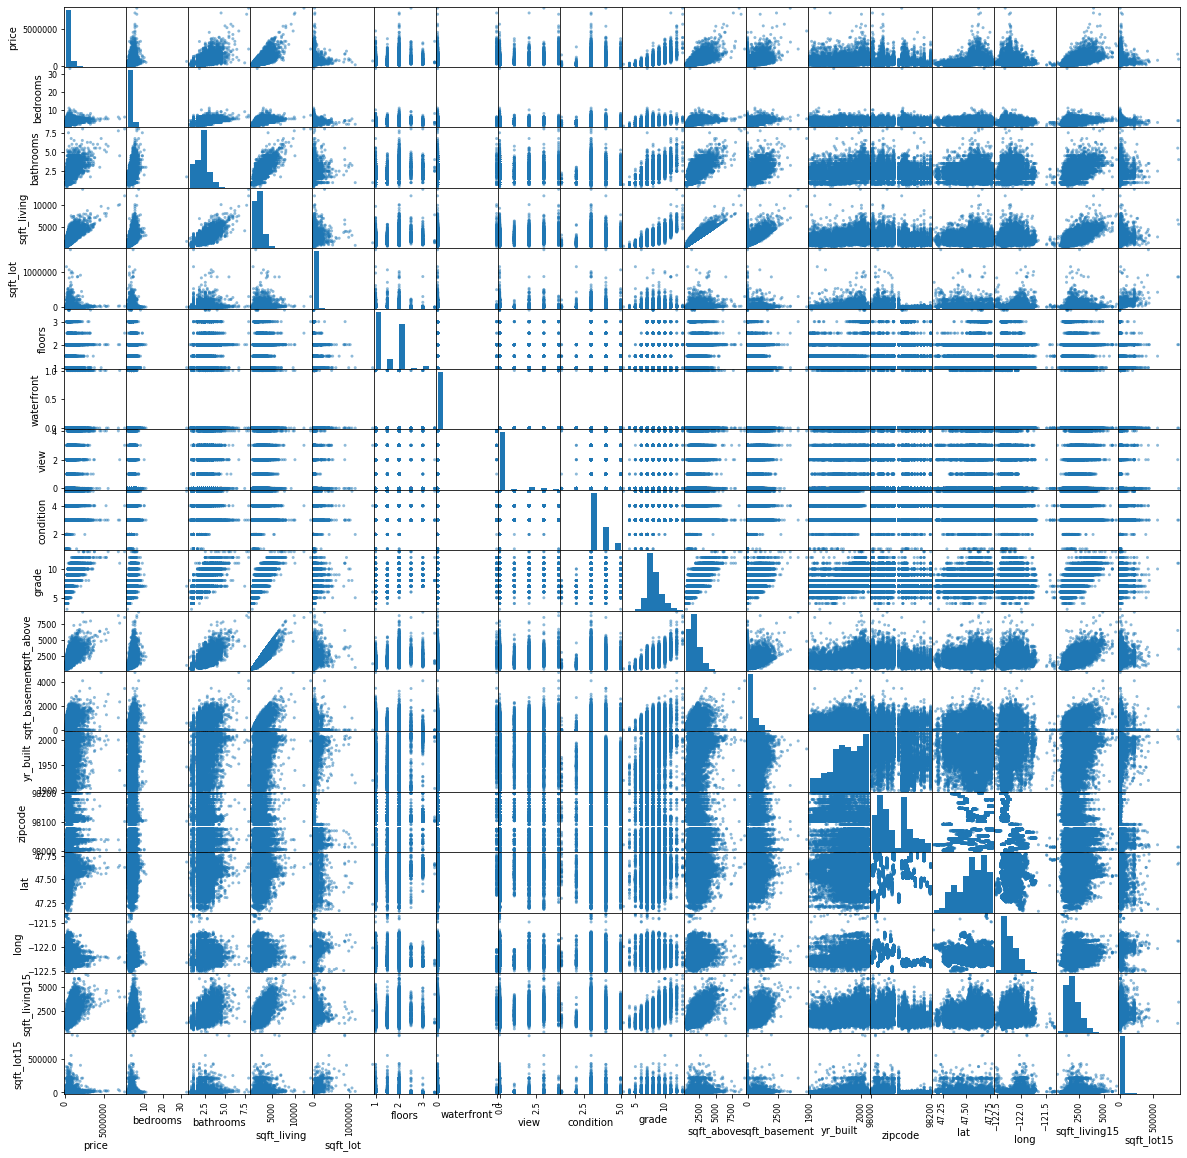

In [13]:
df2 = df1.copy()

phase2_take1 = {}

pd.plotting.scatter_matrix(df1,figsize=(20,20)); 

### Outliers
I want to first remove outliers before scaling data. This seems like the correct approach, because I feel like scaling the data with outliers will produce skewed distributions which I will have to recorrect for outliers anyways, and end up removing the same outlying values I will now. I also want to use min-max scaling as I understand it is better at bringing data into more homogenous scales across columns.

First lets draw boxplots for all our columns to identify which columns we should cull outliers from.

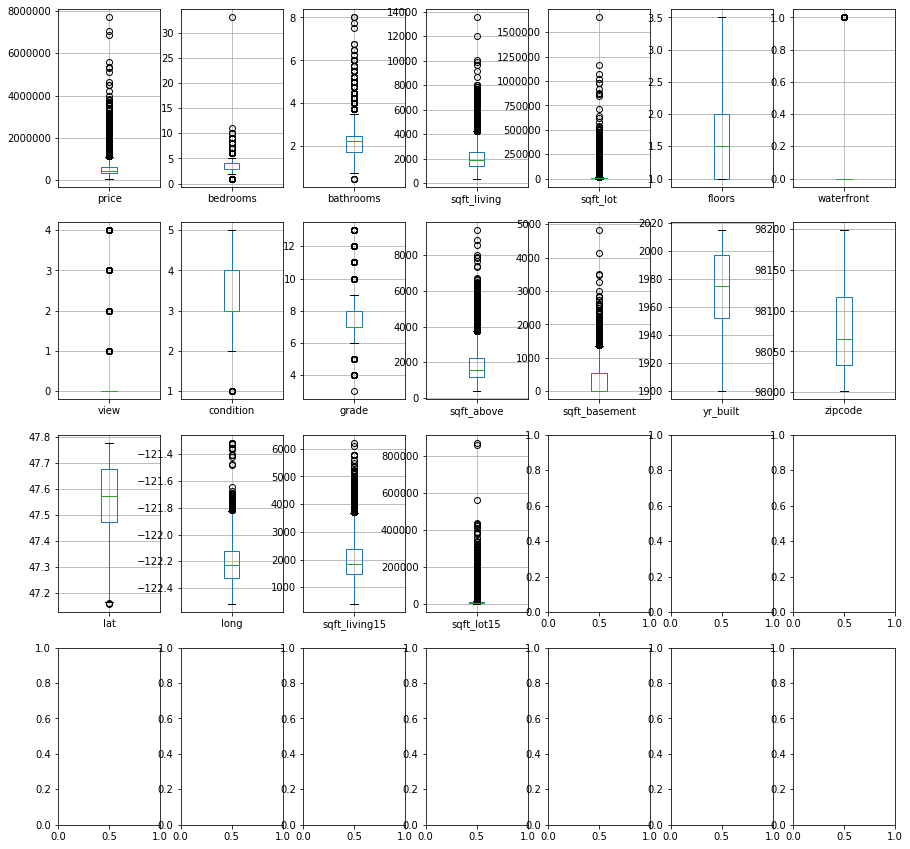

In [14]:
def box_matrix (dataframe):
    ''' generates boxplost for all columns in dataframe'''
    df = dataframe
    col_nums = len(df.columns)
    if col_nums % 7 > 0:
        chart_cols = int(round((col_nums/7)+1,0))
    else:
        chart_cols = int(round((col_nums/7),0))

    figure, ax = plt.subplots(chart_cols,7,figsize=(15,15))

    ax = ax.reshape(-1)

    for i,col in enumerate(df.columns):
        df.boxplot(column=col,ax=ax[i])
     

box_matrix(df2)

From these boxplots, we can identify some good candidates for culling outliers.

In [15]:
cull_cols = ['sqft_lot15','price','sqft_lot','sqft_living15','bedrooms']

Now lets write a couple of functions to cull values. 
To the first one we will pass a dictionary of columns and the highest values we want to retain in each column, which we specifiy manually for each column. 

The second function removes all outliers above a certain percentile for all columns passed into it in list form. 

The third one will use the second function with different threhold values to chart the data loss that results at each threshold, and allow us to identify an optimum threshold. 

In [16]:
def rm_outliers_dict (dataframe, culling_dict):
    ''' Remove values above specified threshold specified for each column'''
    outliers_list = []
    for col in culling_dict.keys():
        outlier_indices = list(dataframe[dataframe[col] >= culling_dict[col]].index)
        outliers_list = outliers_list + outlier_indices
        
    unique_set = set(outliers_list)
    outliers_list = list(unique_set)
    
    dataframe = dataframe.drop(labels=outliers_list)        
    
    return dataframe

def rm_outliers_threshold (dataframe, columns, threshold):
    '''Removes values above specified quantile threshold for all columns passed as list'''
    outliers_list = []
    for col in columns:
        outlier_indices = list(dataframe[dataframe[col] >= dataframe[col].quantile(threshold)].index)
        outliers_list = outliers_list + outlier_indices
        
    unique_set = set(outliers_list)
    outliers_list = list(unique_set)
    
    dataframe = dataframe.drop(labels=outliers_list) 
    return dataframe

def cull_report (dataframe,columns,base_threshold,df_base):
    '''Returns report frame describing row loss from base frame per increment of threshold'''
    
    report_dict = {}
        
    y = int(base_threshold * 100)
    
    for x in range (100,y,-1):
        
        x = float(x/100)
        
        df = rm_outliers_threshold(dataframe,columns,x)
        loss_metrics = row_loss(df_base,df)
        report_dict[str(x)] = loss_metrics
    
    report_df = pd.DataFrame.from_dict(report_dict,orient='index',columns=['rows_dropped','rows_left','row_loss_perc'])
    
    return report_df

First lets remove outliers from our categorical variables. We want to do this by specifying thresholds for each, lest we accidently remove too much data. 

In [17]:
culling_dict = {
    'bedrooms':15,
    'bathrooms':6
}

phase2_take1['categ_culled'] = culling_dict

df2 = rm_outliers_dict(df2,culling_dict)
loss_report(df1,df2)



Rows Dropped: 17    Rows Left: 21403   Percentage Remaining: 99.92


Now lets remove outliers from continuos variables. First we will see what a good quantile threshold is that results is the least loss of overall frame data. 

<Figure size 1440x720 with 0 Axes>

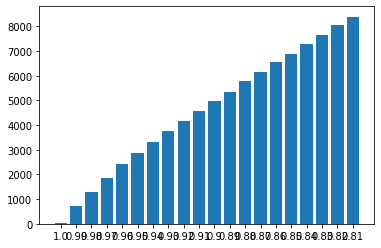

<Figure size 1440x720 with 0 Axes>

In [18]:
contin_cull = ['sqft_lot15','price','sqft_lot','sqft_living15']
phase2_take1['contin_cull'] = cull_cols

df_cull_report = cull_report(df2,contin_cull,.8,df1)

plt.bar(df_cull_report.index,df_cull_report['rows_dropped'])
plt.figure(figsize=(20,10))

It seems like removing rows containing a value that exceeds the .97 quantile for any of the continuous columns is a good place for us to take out the more extreme outliers without losing too much of our data. Lets drop those rows. 

In [19]:
df2 = rm_outliers_threshold (df2, cull_cols,.97)
phase2_take1['contin_cull_thresh'] = .97
loss_report(df1,df2)

Rows Dropped: 3405    Rows Left: 18015   Percentage Remaining: 84.1


Lets see if this improved out scatter plots.

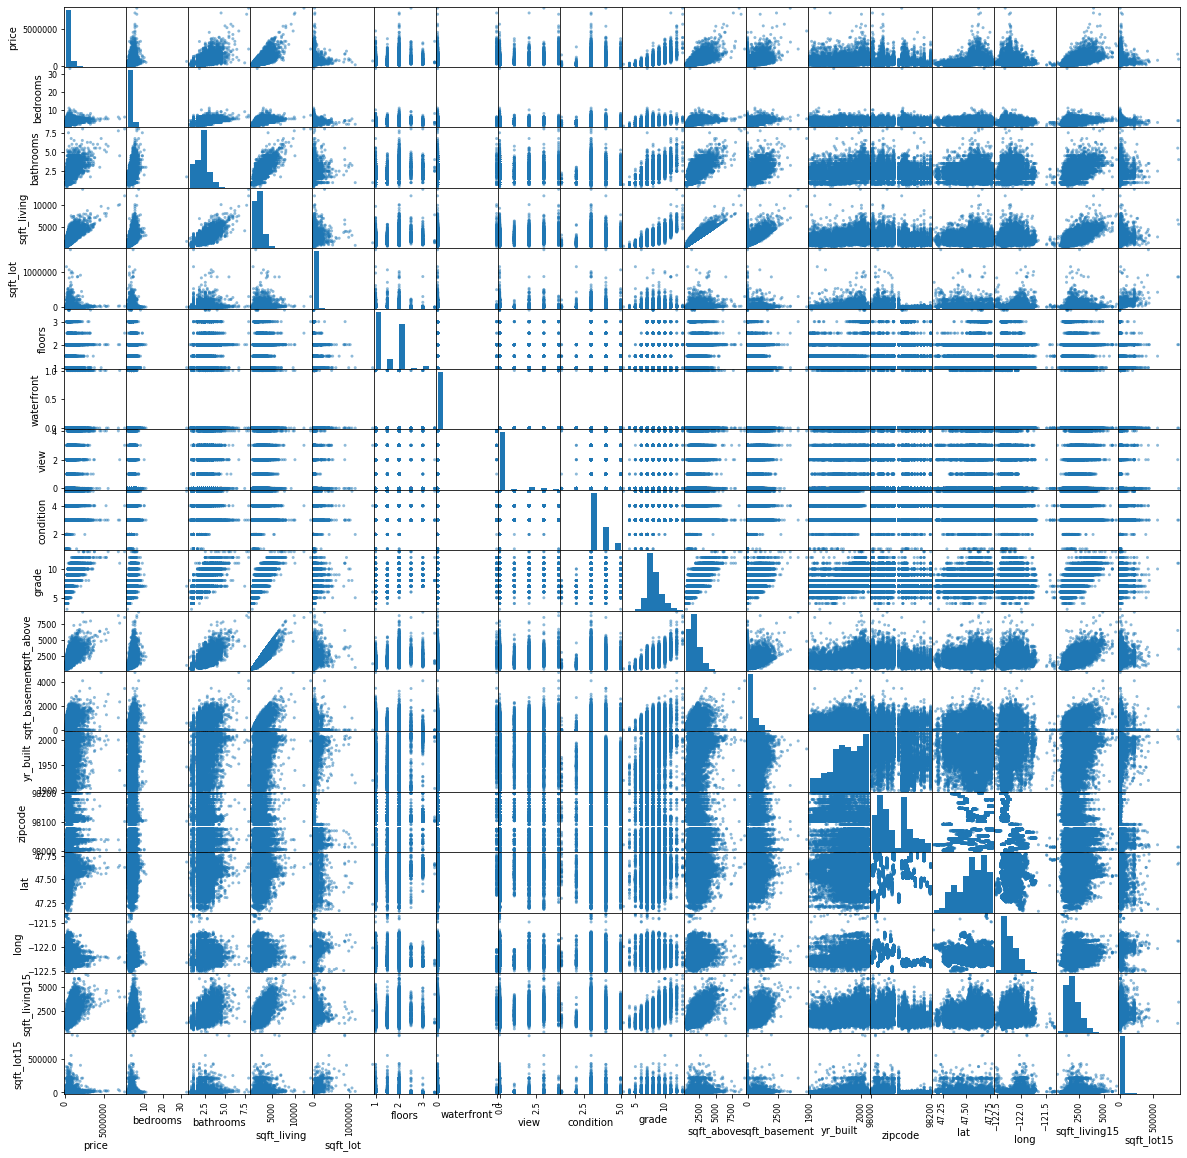

In [20]:
pd.plotting.scatter_matrix(df1,figsize=(20,20));

### Normalizing features. 
Lets pull histograms of our features to get a sense of their distributions. 

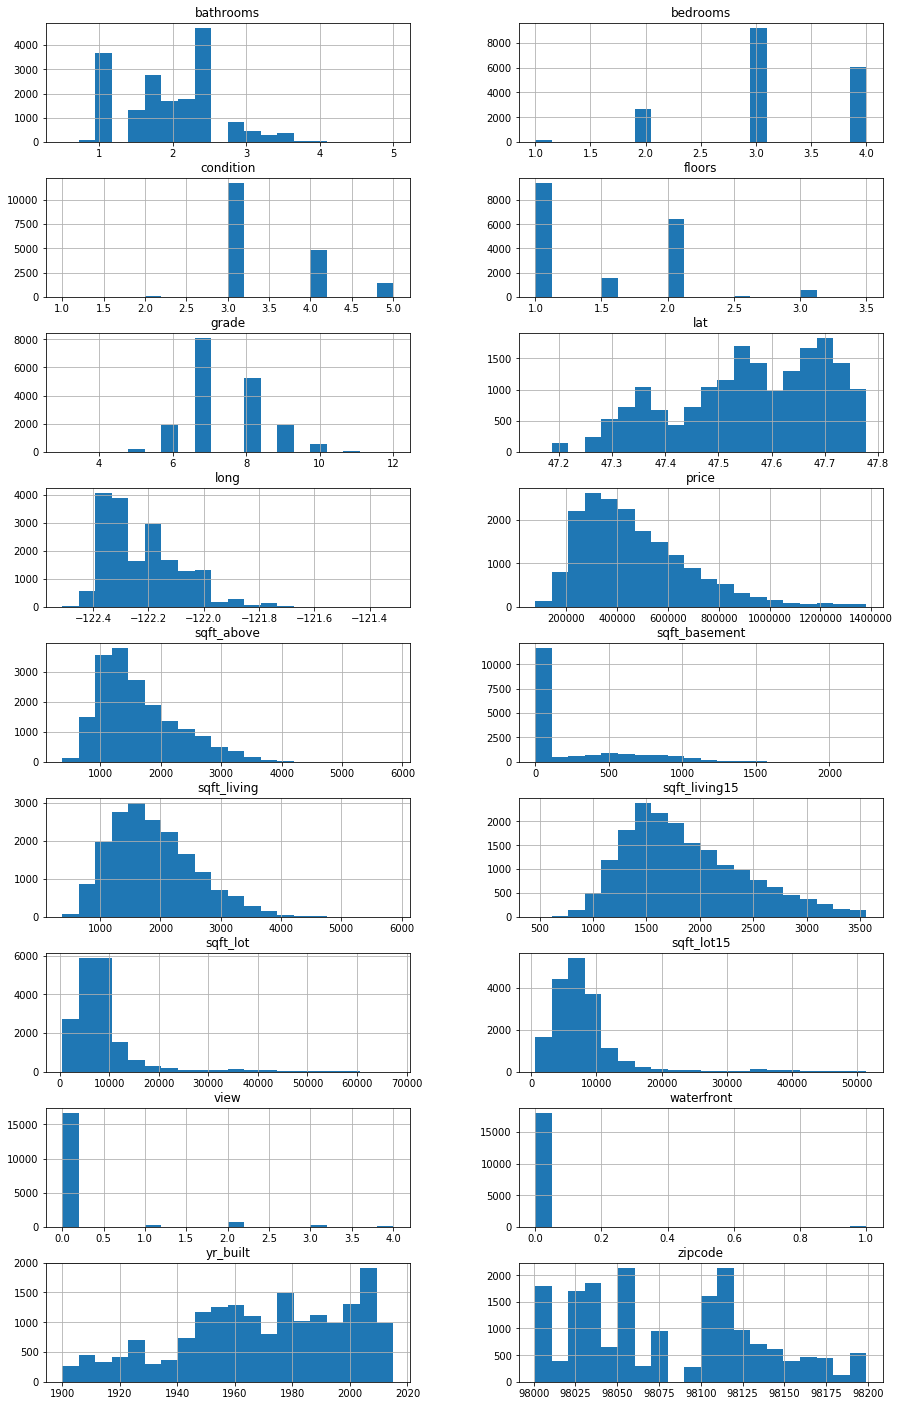

In [21]:
df2.hist(bins=20,layout=(9,2),figsize=(15,25));

From these histograms we can see that our continuos variables could benefit from normalization. However, I wonder if we should normalize 'price', given that it will be our target variable? Opinion is divided on whether normalizing or scaling the target is a good idea. Lets hold off for now, and perhaps we can revisit this question later.

In [22]:
cols_normed = ['sqft_above','sqft_living15','sqft_lot','sqft_lot15','sqft_living']
phase2_take1['cols_normed'] =cols_normed

Below is a function that will normalize specified columns in a dataframe using np.log. Lets use it to normalize the columns we want. 

In [23]:
def logarize (dataframe,columns):
    
    df = dataframe
    
    for col in columns:
        df[col] =df[col].map(lambda x: np.log(x))
    
    return df

df2 = logarize(df2,cols_normed)

Lets plot histograms again to make sure. 

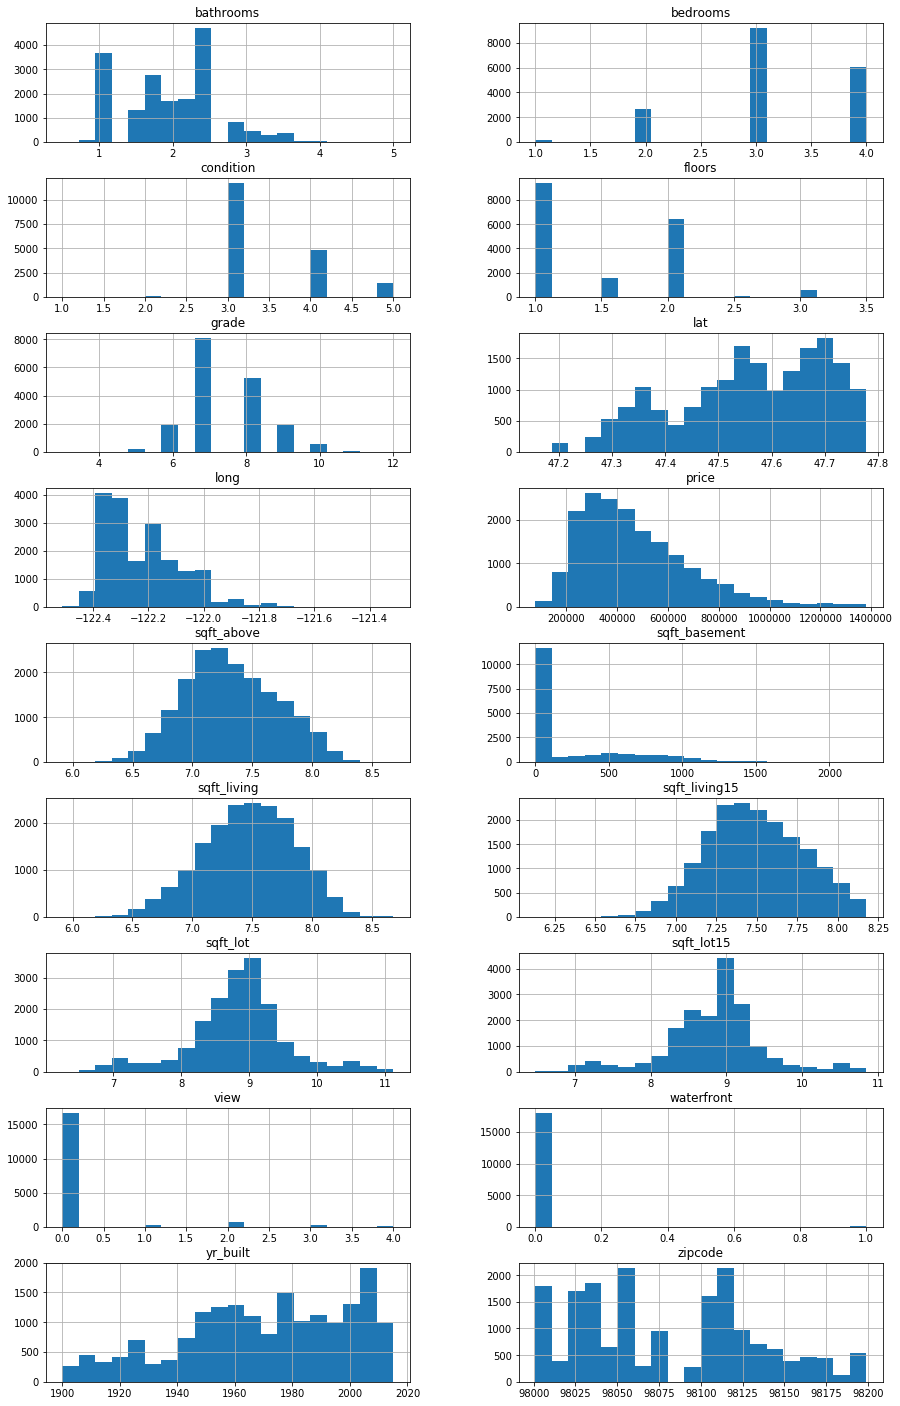

In [24]:
df2.hist(bins=20,layout=(9,2),figsize=(15,25));

Good! now Price and the Square footage features have much more normal distributions. 

### Colinearity

Lets check colinearity across all columns, to help us remove redundant features. 
A heatmap of correlation values will helpful to visually assess correlation among the features. 

The function below generates a clean, non-redundant heatmap of correlation values for the columns of our dataframe. 

(<Figure size 864x864 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f142c340390>)

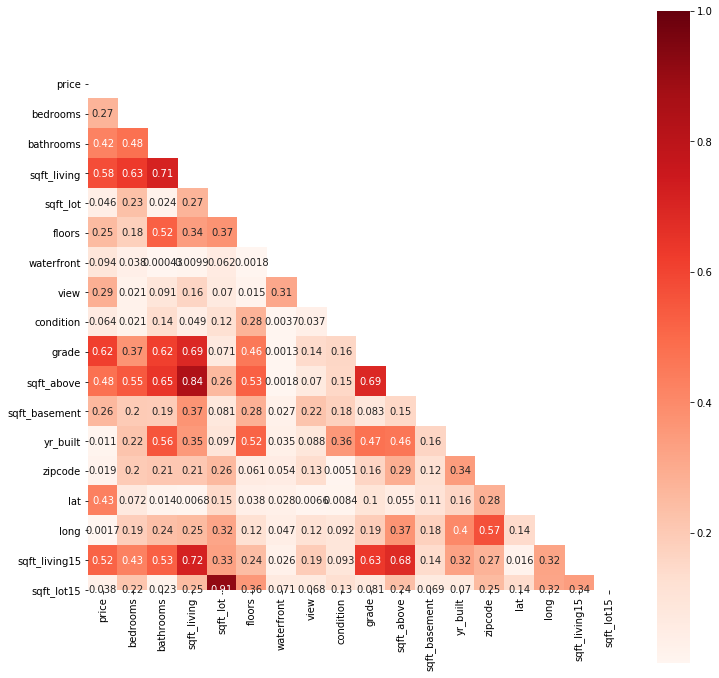

In [25]:
def colinearity_plot(corr,figsize=(12,12)):
    '''non-redundant heatmap of colinearity among columns of dataframe passed in'''
    fig, ax = plt.subplots(figsize=figsize)

    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True

    sns.heatmap(np.abs(corr),square=True,mask=mask,annot=True,cmap="Reds",ax=ax)
    return fig, ax

colinearity_plot(np.abs(df2.corr()))

It looks like some features a strongly co-related, and hence good candidates for removal on account of the multi-colinearity they introduce into the model. 

The function below returns a series consisting of pairs of columns with a Pearson correlation co-efficient higher than 
the specified threshold. The column pairs are displayed as elements of a multilevel index.

We will use this function to return a list of feature pairs with a co-relation value higher than 0.75.

In [26]:
 def high_corr(dataframe,threshold):
    '''returns multi indexed series of feature pairs with correlation above specified threshold'''
    corr = dataframe.corr()
    sign_corr = corr[abs(corr) > threshold]
    sign_corr = sign_corr.stack()
    sign_corr.drop_duplicates(inplace=True)
    sign_corr = sign_corr[sign_corr != 1]
    
    
    return sign_corr

display(high_corr(df2,0.75))

sqft_living  sqft_above   0.84
sqft_lot     sqft_lot15   0.91
dtype: float64

#### Analysis

    Looks like sqft_above and sqft_lot15 have very high levels of corelation with other, more on point features. Lets remove them. 

In [27]:
colinear_columns = ['sqft_above','sqft_lot15']
phase2_take1['colinear_columns'] = colinear_columns

df2 = df2.drop(colinear_columns,axis=1)

### Categorical Variables
We must evaluate our features to see if any of them can rightly be treated as categorical variables, and then undertake the appropriate transformations of our data. From the scatter plots we drew before it seems that Zipcode definitely seems like a good for the application of one hot encoding. So does Waterfront. However, the remaining variables that look categorical from the scatter plots seem...inherently numeric, granted they dont have a large range of values. The number of floors a house has is still a number. Condition and grade are attempts to quantify qualitative features, and as such have already been converted to numeric features for us. 

Im also going to make a copy of the df2 frame here, before applying one hot encoding to the dataframe, because I need a dateframe in this state for the next section on exploration

In [28]:
categ_cols =  ['zipcode','waterfront']
phase2_take1['categ_cols'] = categ_cols

df_zipcode = df2.copy()

Now lets run one hot encoding on zipcode and then compile our final scaled dataframe. The function below returns a dataframe with the one-hot columns for the specified columns tacked on to the original dataframe.

In [29]:
def category_frame (dataframe,categ_cols):
    for col in categ_cols:
        cat_frame = pd.get_dummies(dataframe[col],drop_first=True)
        cat_frame = cat_frame.astype('int64')
        
        dataframe = dataframe.merge(cat_frame,left_index=True,right_index=True)        
        dataframe.fillna(0)
    return dataframe

df2 = category_frame(df2,categ_cols)
df2.drop(categ_cols,axis=1)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                            
2202500290   435,000.00         4       1.00         7.28      9.08    1.00   
7853361370   555,000.00         4       2.50         8.10      8.78    2.00   
7197300105   550,000.00         4       2.50         7.57      9.26    1.00   
3438501320   295,000.00         2       2.50         7.40      7.22    2.00   
472000620    790,000.00         3       2.50         7.86      8.47    1.00   
...                 ...       ...        ...          ...       ...     ...   
6752600320   360,000.00         4       2.50         7.61      8.89    2.00   
8149600265   725,000.00         4       1.75         7.59      8.67    1.00   
4166600610   335,000.00         3       2.00         7.25     10.71    1.00   
5101400871   445,500.00         2       1.75         7.24      8.81    1.00   
9106000005 1,310,000.00         4       2.25         8.23      8.52    2.00   

            view  condition  grade  sqft_basement  ...  98148  98155  98166  \
id                                                 ...                        
2202500290  0.00          4      7           0.00  ...      0      0      0   
7853361370  0.00          3      8           0.00  ...      0      0      0   
7197300105  0.00          4      7         800.00  ...      0      0      0   
3438501320  0.00          3      7         350.00  ...      0      0      0   
472000620   0.00          4      9         900.00  ...      0      0      0   
...          ...        ...    ...            ...  ...    ...    ...    ...   
6752600320  0.00          3      7           0.00  ...      0      0      0   
8149600265  1.00          4      8         600.00  ...      0      0      0   
4166600610  0.00          4      7           0.00  ...      0      0      0   
5101400871  0.00          3      6         670.00  ...      0      0      0   
9106000005  0.00          5      8       1,310.00  ...      0      0      0   

            98168  98177  98178  98188  98198  98199  1.0  
id                                                         
2202500290      0      0      0      0      0      0    0  
7853361370      0      0      0      0      0      0    0  
7197300105      0      0      0      0      0      0    0  
3438501320      0      0      0      0      0      0    0  
472000620       0      0      0      0      0      0    0  
...           ...    ...    ...    ...    ...    ...  ...  
6752600320      0      0      0      0      0      0    0  
8149600265      0      0      0      0      0      0    0  
4166600610      0      0      0      0      0      0    0  
5101400871      0      0      0      0      0      0    0  
9106000005      0      0      0      0      0      0    0  

[18015 rows x 84 columns]

### Scaling


Its time to scale our features. I will use min-max, since I have already removed outliers. 

In [30]:
def min_max_col (series):
    scaled = (series - min(series)) / (max(series) - min(series))
    return scaled

def df_scaler (dataframe,col_list):
    for col in col_list:
        dataframe[col] = min_max_col(dataframe[col])
    return dataframe

scaled_cols = list(df2.columns)
scaled_cols.remove('price')
phase2_take1['scaled_cols'] = scaled_cols

df2 = df_scaler(df2,scaled_cols)

In [31]:
phase2_take1['contin_cull_thresh'] = 0.97
print(list(phase2_take1.keys()))

['categ_culled', 'contin_cull', 'contin_cull_thresh', 'cols_normed', 'colinear_columns', 'categ_cols', 'scaled_cols']


### Consolidated Reprocessing Function
In case we want to revisit our dataset and pre-process it differently to make improvements to our model, lets define a master function with which we can easily reprocess out data. We will feed it a dictionary specifying which columns to scrub for outliers, the columns we want to normalize using np.log and which columns to convert to one hot encoded categories. It will return a processed dataframe. 

In [32]:
def pre_process (dataframe,dictionary):
    
    dict = dictionary
    
    dataframe = rm_outliers_dict(dataframe,dict['categ_culled'])
    
    dataframe = rm_outliers_threshold(dataframe,dict['contin_cull'],dict['contin_cull_thresh'])
    
    dataframe = logarize(dataframe,dict['cols_normed'])
    
    dataframe = dataframe.drop(dict['colinear_columns'],axis=1)
    
    dataframe = category_frame(dataframe,dict['categ_cols'])
    
    dataframe = dataframe.drop(dict['categ_cols'], axis=1)
    
    for col in dict['categ_cols']:
        if col in dict['scaled_cols']:
            dict['scaled_cols'].remove(col)
    
    dataframe = df_scaler(dataframe,dict['scaled_cols'])
    
    dataframe = dataframe.fillna(0)
    
    print(loss_report(df1,dataframe))
        
    return dataframe
    
    

# EXPLORE

## QUESTION 1: How does home price and value vary geographically?
I would like to explore the variations in data across zipcodes in depth. It would be nice to have a geographic sense of house values, would'nt it? Lets import the GeoPands library to generate some map based visualizations to see how the different metrics in our dataset vary across geographic regions.


In [33]:
import geopandas as gpd

df_zipcode = df_zipcode.groupby('zipcode').median()
df_zipcode.reset_index(level=0, inplace=True)

king_count = gpd.read_file('king_county_shapefile/Zipcodes_for_King_County_and_Surrounding_Area_Shorelines__zipcode_shore_area.shp')

king_count.drop(['OBJECTID','ZIP','ZIP_TYPE'],axis=1,inplace=True) 
king_count['ZIPCODE'] = pd.to_numeric(king_count['ZIPCODE'])
king_count = king_count.merge(df_zipcode,left_on='ZIPCODE',right_on='zipcode',how='inner')

king_count['coords']= king_count['geometry'].apply(lambda x : x.representative_point().coords[:])
king_count['coords']= [coords[0] for coords in king_count['coords']]

#dropping the western most zipcodes. Theyre sparsley populated, not very itneresting and is skewing out maps below
king_count = king_count[king_count['long'] < -122.00]
#king_count = king_count[king_count['zipcode'] != 98022]

### Price 
Lets start by looking at what zipcodes have the highest median sale price 

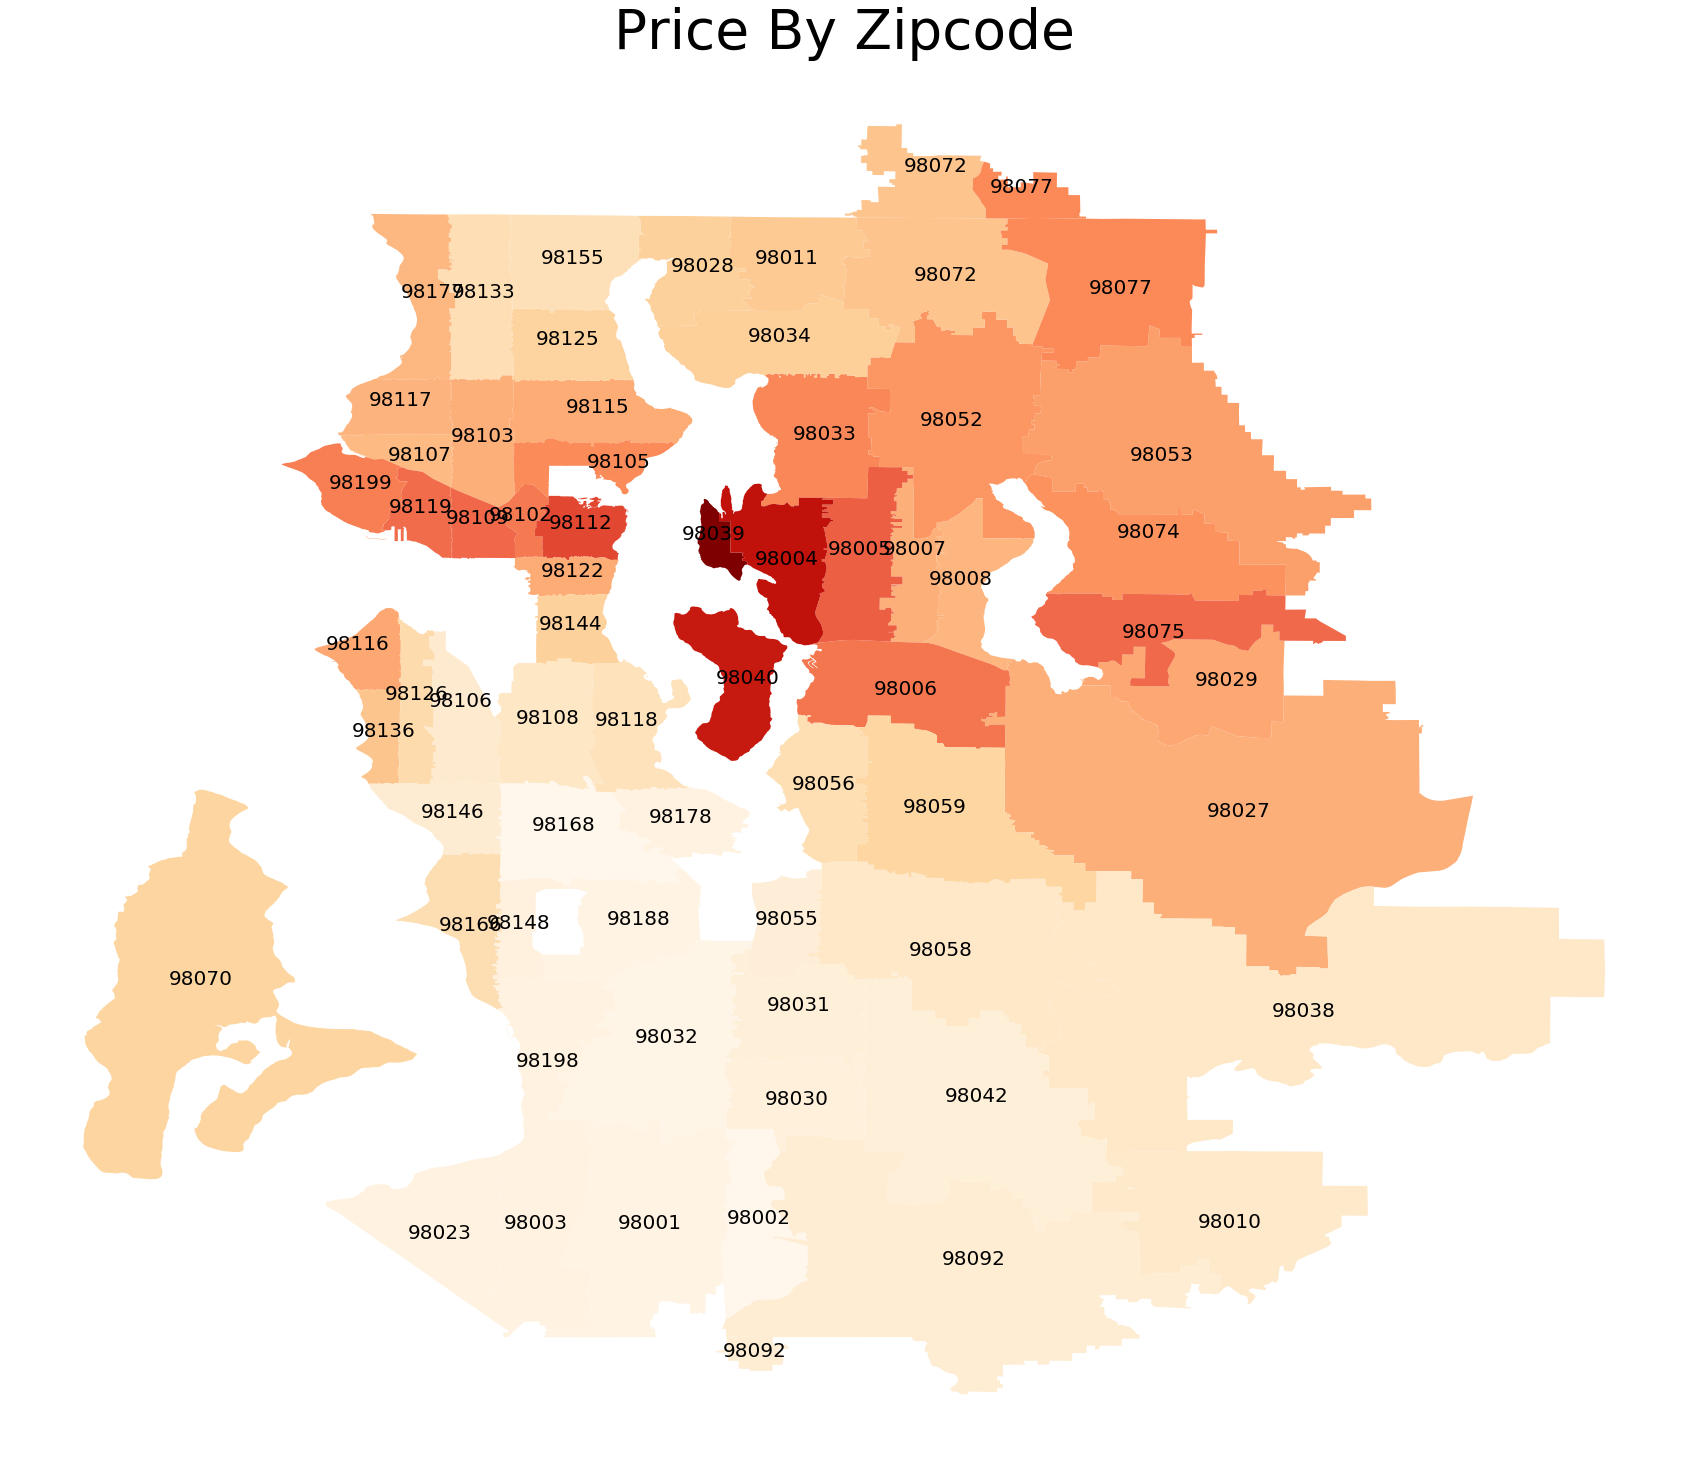

In [34]:
mpl.rcParams['figure.figsize'] = (30,30)

title_dict = {'fontsize': 55,
 'fontweight' : 15}

king_count.plot(column='price',cmap='OrRd',legend=False)

for idx, row in king_count.iterrows():
    plt.annotate(s=row['ZIPCODE'], xy=row['coords'],
                 horizontalalignment='center',size=20)

plt.axis('off')
plt.title('Price By Zipcode',fontdict=title_dict)

plt.savefig('plot_images/price_map')

As one would expect, the price of houses seems to get higher closer to the city center and drop as we head out. 
98040 and 98039 seem to have the most expensive properties! I wonder why that is?


### Price per square foot

Let's engineer a new feature called "Price/Sqft" which will reflect the price per square foot. My hypothesis is that this metric will vary in tandem with geographic location. 

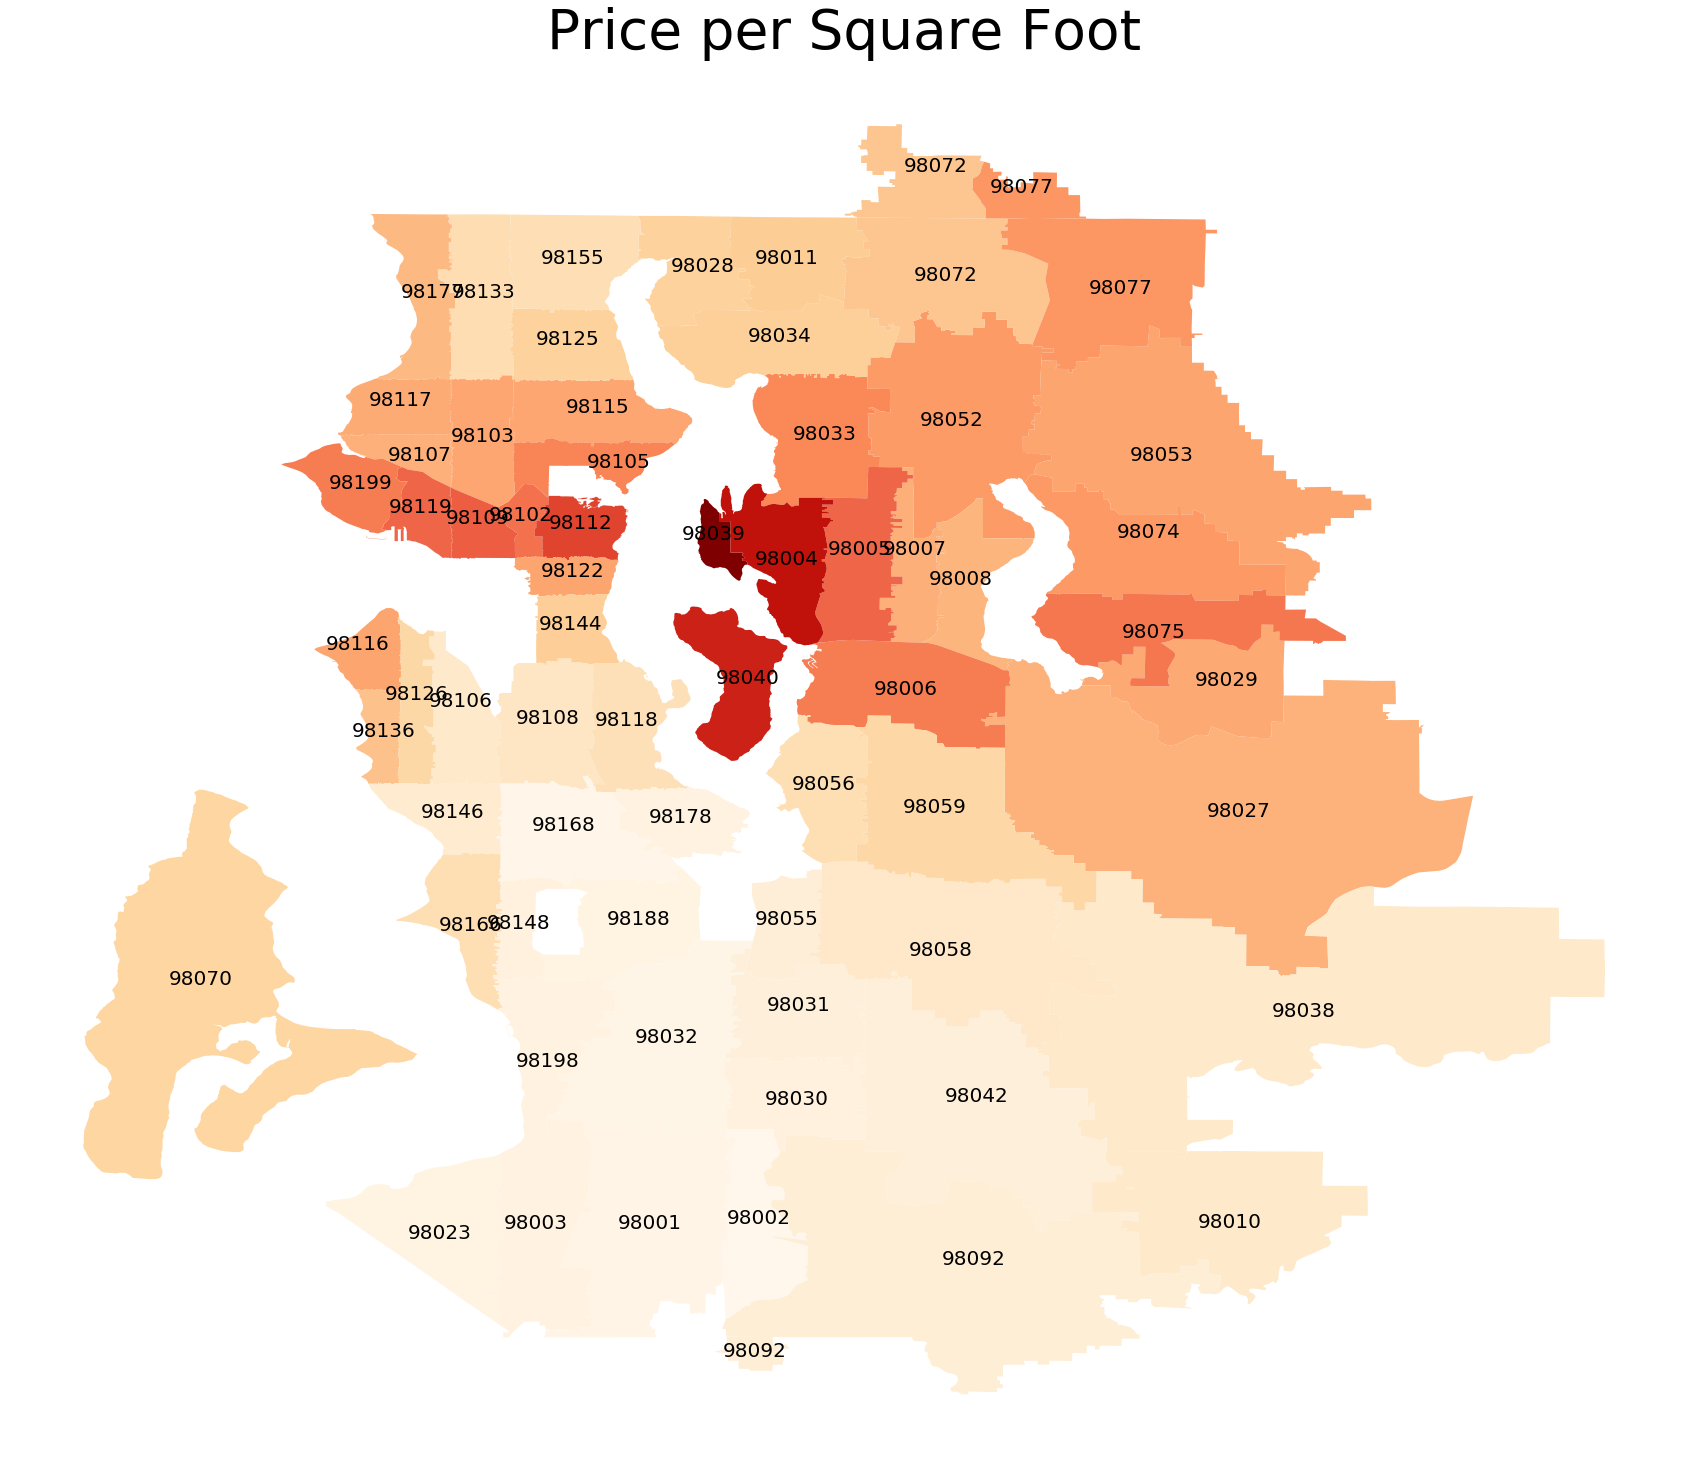

In [35]:
king_count['price/sqft'] = king_count['price']/king_count['sqft_living']

king_count.plot(column='price/sqft',cmap='OrRd',legend=False)

plt.axis('off')
plt.title('Price per Square Foot',fontdict=title_dict)

for idx, row in king_count.iterrows():
    plt.annotate(s=row['ZIPCODE'], xy=row['coords'],horizontalalignment='center',size=20)
    
plt.savefig('plot_images/price_sqft_map')

This is a more stable metric and aligns closely with the proposition that living space is more valuable closer to the city center. 

## QUESTION 2: How are living space and lot size related, and how do they vary geographically?

### Indoor Square Footage

Now lets see how indoor square footage varies across the region. I suspect, it will vary in the opposite way as price, which is to say that indoor square footage per house will be smaller towards the city center and larger as we go out. 

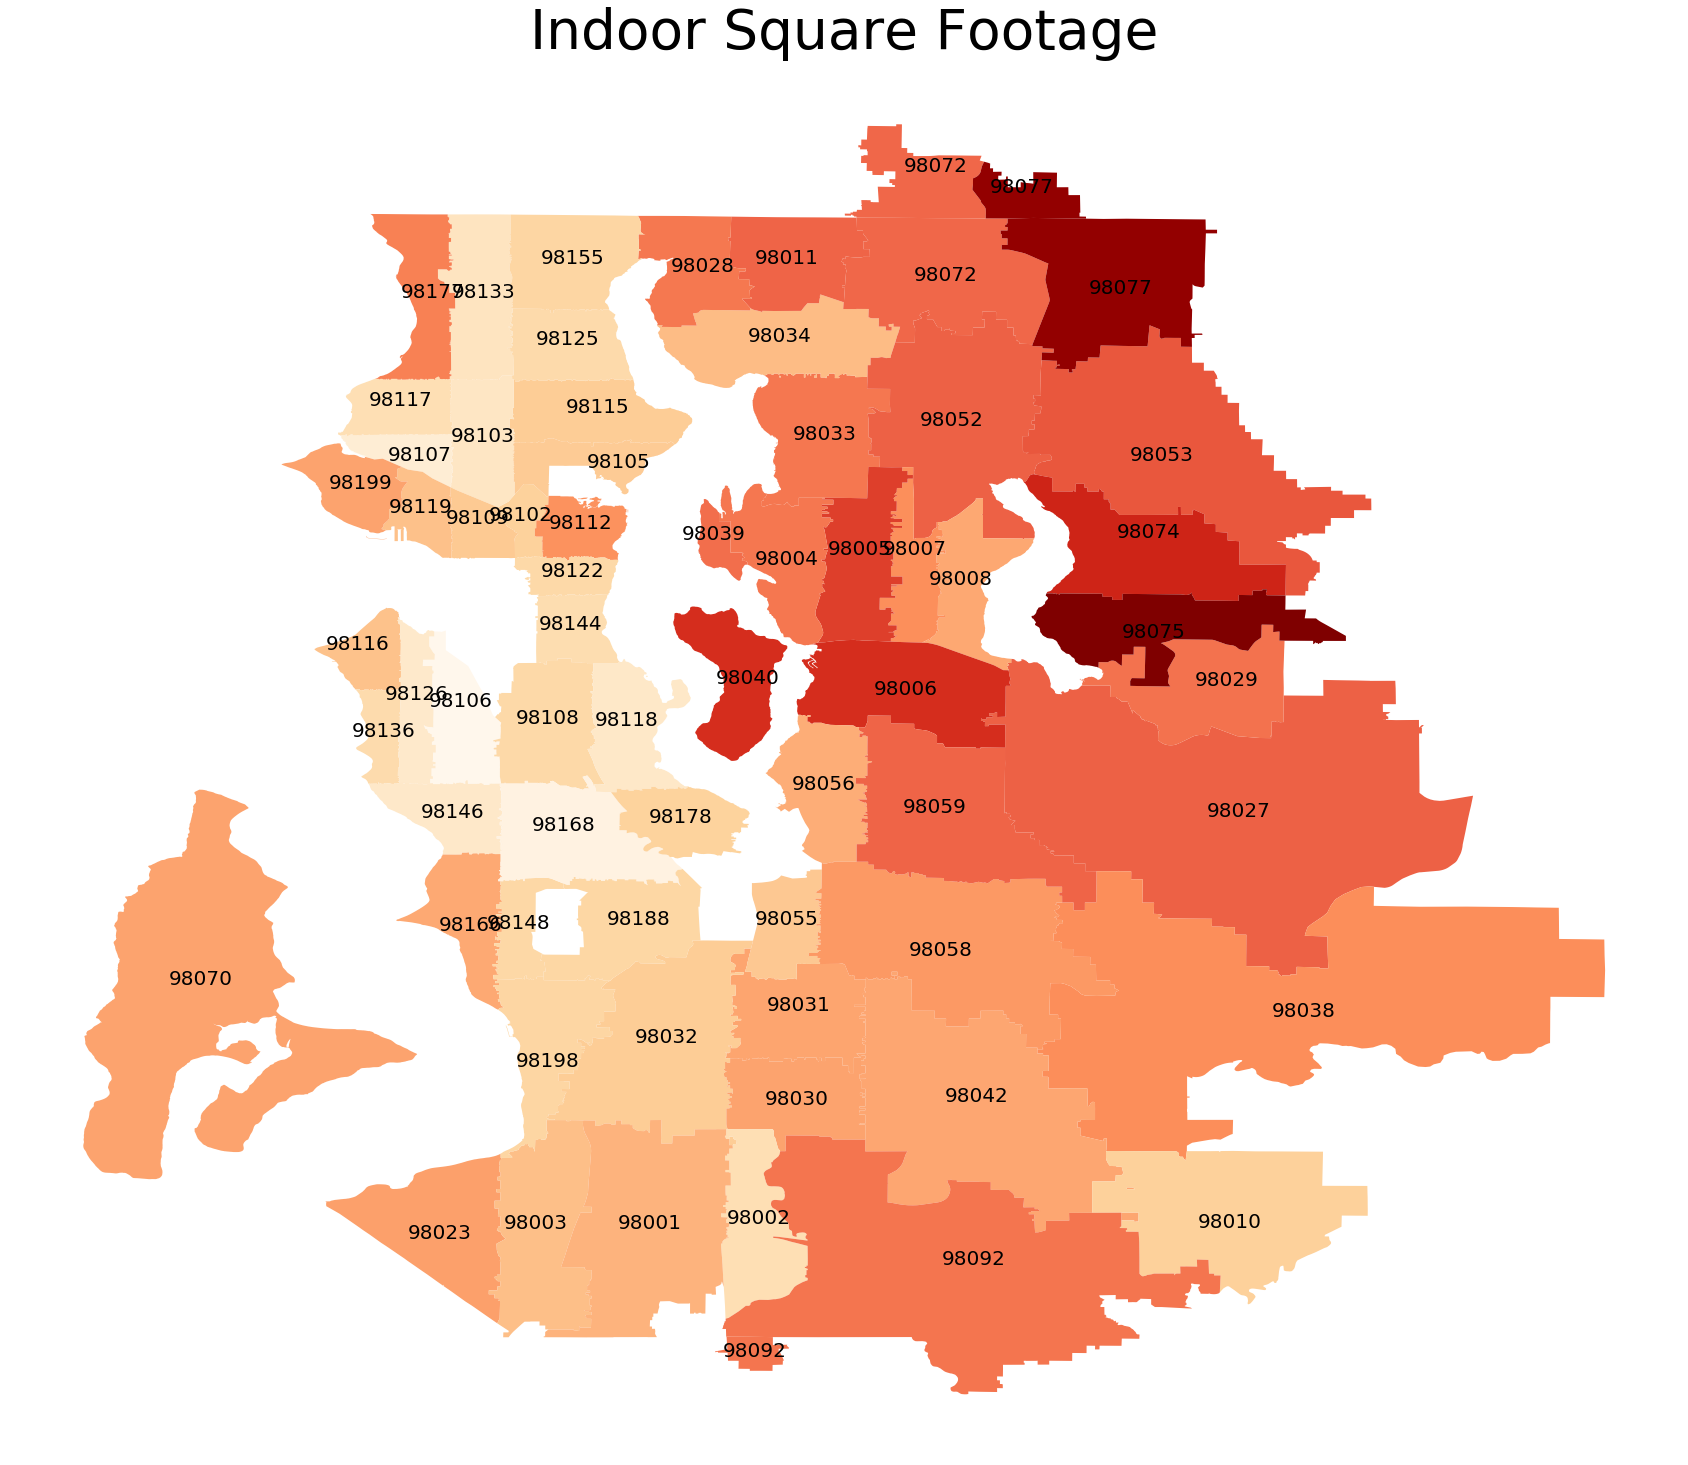

In [36]:
king_count.plot(column='sqft_living',cmap='OrRd',legend=False)

plt.axis('off')
plt.title('Indoor Square Footage',fontdict=title_dict)

for idx, row in king_count.iterrows():
    plt.annotate(s=row['ZIPCODE'], xy=row['coords'],horizontalalignment='center',size=20)
    
plt.savefig('plot_images/sqft_above_map')

Sure enough, our hypothesis checks out. Oh my 98075 looks like it has some huge mansions!It also seemed like the median price here was high too, relative to its neighbors.
This must be a fancy neighborhood! 

### Lot size
Now lets see see how lot sizes change. I Imagine similarly to indooor square footage. 

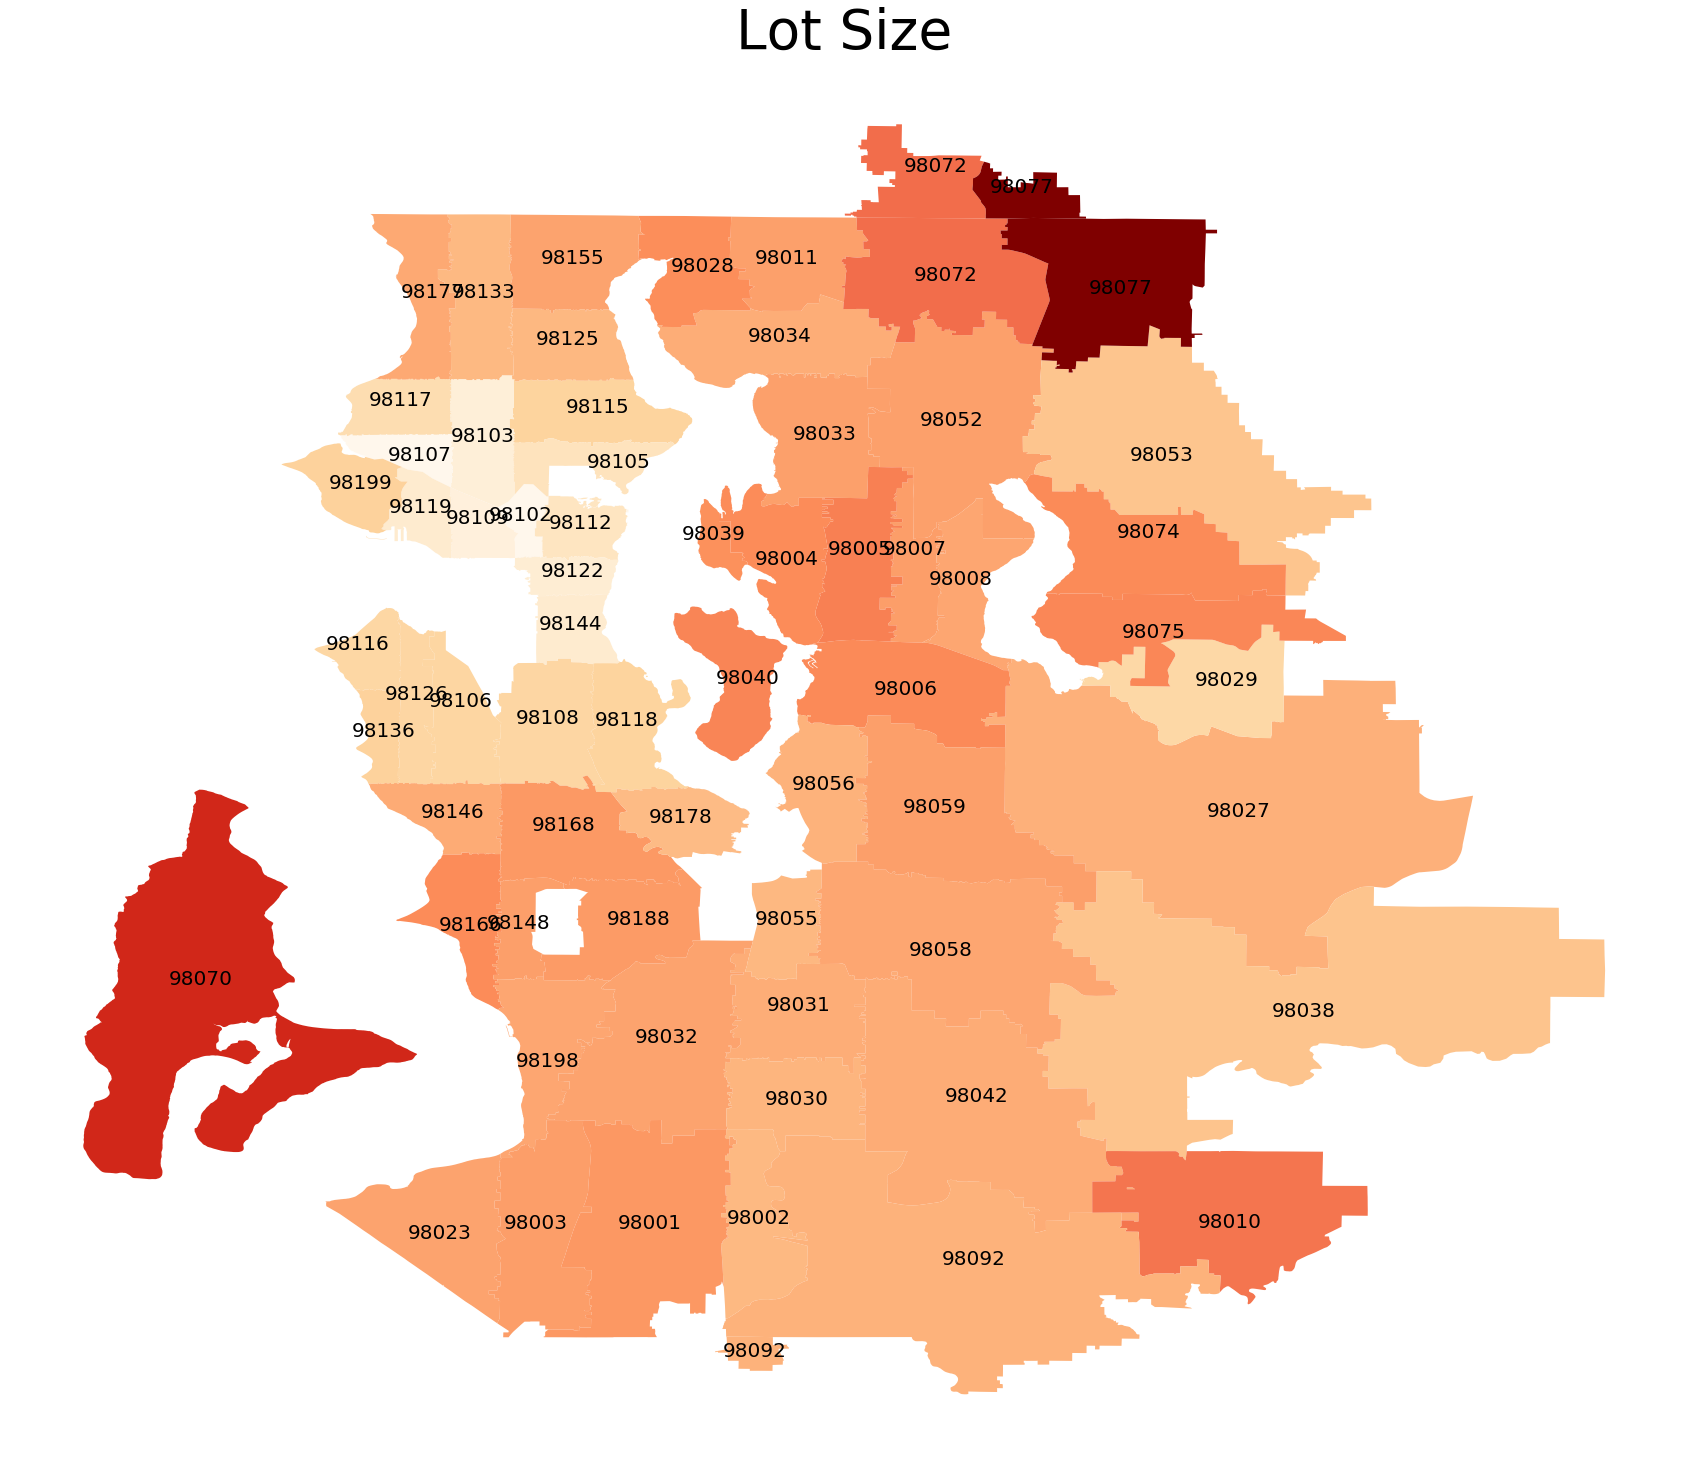

In [37]:
king_count.plot(column='sqft_lot',cmap='OrRd',legend=False)

plt.axis('off')
plt.title('Lot Size',fontdict=title_dict)

for idx, row in king_count.iterrows():
    plt.annotate(s=row['ZIPCODE'], xy=row['coords'],horizontalalignment='center',size=20)
    
plt.savefig('plot_images/lot_size_chart')

### Lot size to Living Space ratio

Looks like 98075's neighbors to the north, 98074, have bigger yards but smaller houses. 
Lets engineer a new features called "indoor/lot". This will be ratio of the indoor square footage to the lot size. 
Basically, how much indoor space per unit of lot size. Lets make a new map for this feature. Might be a better way to get an estimate of living space density.

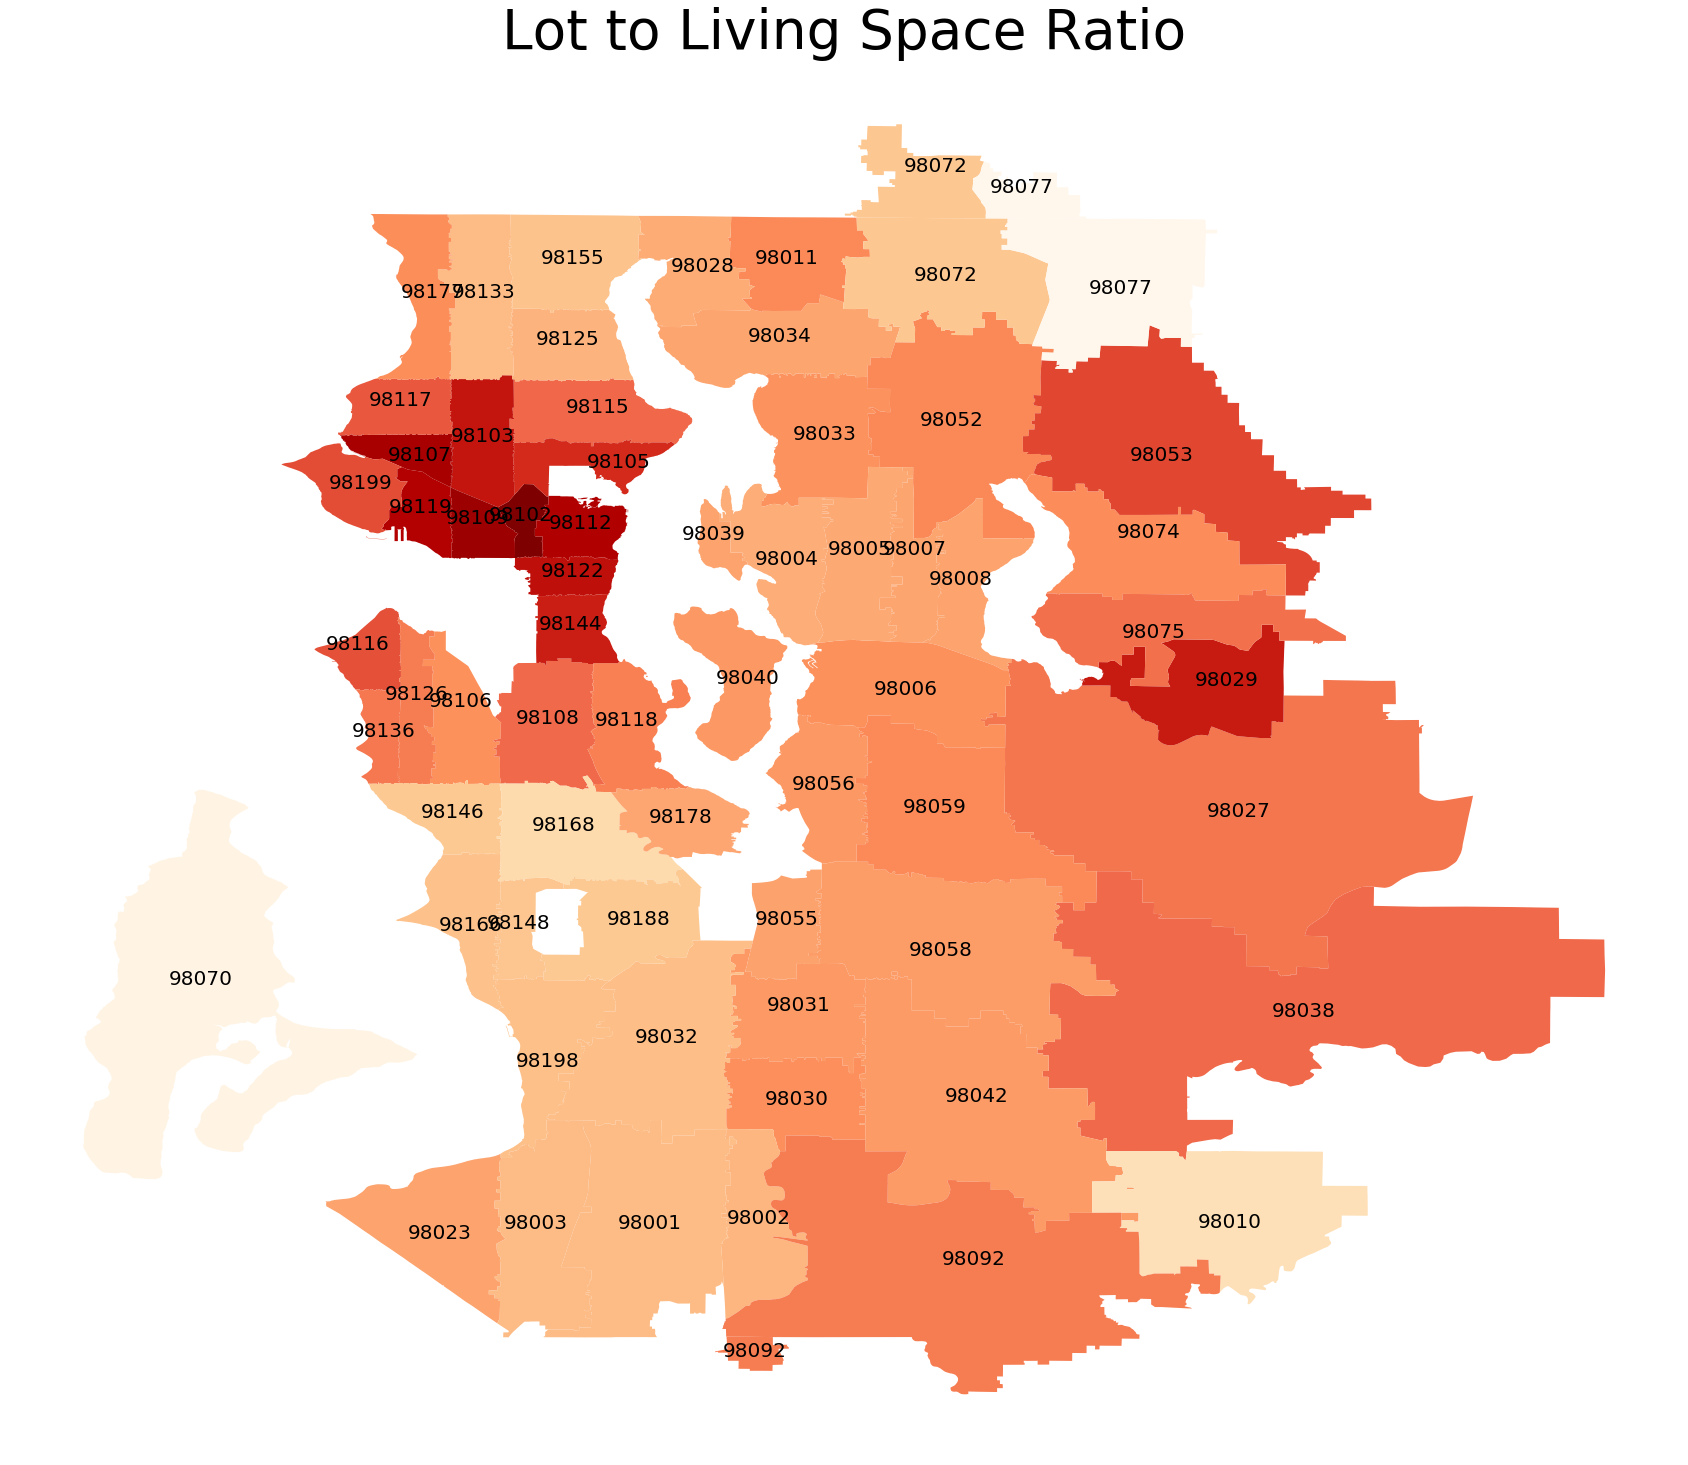

In [38]:
king_count['indoor/lot'] = king_count['sqft_living']/king_count['sqft_lot']

king_count.plot(column='indoor/lot',cmap='OrRd',legend=False)

plt.axis('off')
plt.title('Lot to Living Space Ratio',fontdict=title_dict)

for idx, row in king_count.iterrows():
    plt.annotate(s=row['ZIPCODE'], xy=row['coords'],horizontalalignment='center',size=20)
    
plt.savefig('plot_images/lot_vs_indoor_map')

Fascinating. As well see, there is more living space on each lot closer to the city center. This is probably due to the fact there are more apartment buildings closer to the city, so the living space per unit area is denser which is in line with what we expect from major cities. 

It also confirms that 98074 people do have larger yards, while 98075 folks have larger houses. 


# MODEL

Our aim for the proejct is to build a model that can predict the price of a home based on other data about that home, with relative accuracy. To achieve this goal we will use multiple linear regression methods implemented using statsmodels. 

Our overall methodology will be as follows

1. We will pull in different version of our primary dataset, modified in different ways for each trial. 
2. We will fit a preliminary model to this data set. 
3. We will assess the p-values assigned to the co-efficients of our preliminary model, filter them out, and re-train our model
4. We will validate the model using train-test-split over a number of iterations to ensure the integrity of our results. 

To filter out features with high p-values, we will use the following functions:

In [39]:
def remove_pvals (model,dataframe):
    ''' Removes columns representing features with high p-values'''
    pvalues = round(model.pvalues,4)
    pvalues = pvalues.drop('const')
    high_pvalues = pvalues[pvalues > 0.05]    
    high_list = list(high_pvalues.index)

    dataframe = dataframe.drop(high_list,axis=1)
    
    return dataframe 

For our first trial, we will use a custom function to identify what constitutes a good sample size. For the remaining trials, we will assume that it is still the best sample size to use to split the data into training and test sets. 

The following function will split our dataset into chunks ranging from 5% of the dataset to 95% of the dataset, in increments of 5%. For each test, we will generate a hundered random splits of the data into training and test sets of the given test size. We will fit our model, use it to predict values on the test set and the gather the mean squared error for each iteration in the 25 random samples. We will take the average mean squared error from 25 samples at each test size and add them to a results data frame. In this way, we will be able to analyze the spread in the mean squared error between the training set and the test set, for different sizes of test sets. 

In [40]:
from sklearn.model_selection import train_test_split
mpl.rcParams['figure.figsize'] = (20,10)

def test_size_validation (predictors,target):
    collection = []
    size = []
    x= 0.05
    
    while x < 0.95:
        
        errorlist = []
        
        for j in range(1,50):
            
            x_train,x_test,y_train,y_test= train_test_split(predictors,target,test_size=x)
            
            x_train_int= sm.add_constant(x_train)
            
            x_test_int= sm.add_constant(x_test)
            
            olsmod = sm.OLS(y_train,x_train_int).fit()
                       
            y_train_hat = olsmod.predict(x_train_int)
            
            y_test_hat = olsmod.predict(x_test_int)
            
            train_mse = np.sum((y_train - y_train_hat)**2/len(y_train))

            test_mse = np.sum((y_test - y_test_hat)**2/len(y_test))
            
            errorlist.append([train_mse,test_mse])


        saveframe = pd.DataFrame(errorlist,columns=['train','test'])   
        collection.append([str(x), round(saveframe['train'].mean(),3),round(saveframe['test'].mean(),3),0])   

        x = round((x + 0.05),2)

    coll_frame = pd.DataFrame(collection,columns=['size','train','test','delta%'])
    coll_frame['delta%'] = ((coll_frame['test'] - coll_frame['train'])/coll_frame['train']) * 100
    coll_frame['delta%'] = round(coll_frame['delta%'],2)
    coll_frame.set_index('size',inplace=True)    
    
    return coll_frame


The function below will chart the results of our test size validation function. 

In [41]:
def chart_train_test (predictors,target):
    coll_frame = test_size_validation(predictors, target)

    fig, ax = plt.subplots(2,1)

    coll_frame.sort_index(ascending=True,inplace=True)

    ax[0].scatter(coll_frame.index.values,coll_frame['train'],c='red')
    ax[0].scatter(coll_frame.index.values,coll_frame['test'],c='blue')

    coll_frame.sort_values('delta%',ascending=True,inplace=True)
    ax[1].bar(coll_frame.index.values,coll_frame['delta%'])



The following function will generate 25 different training and testing sets of the specified size, train and fit a model one each, gather up the results and average them out. This will ensure that our results are not affected too much by randomness. We will collect the mean r2, rmse as well as rmse expressed as percentage of target mean. This last metrics should allow us to compare models where the target is on different scales. 

In [42]:
from math import sqrt
def mse_validation (predictors,target,size):
    collection = []
              
    errorlist = []

    for j in range(1,25):

        x_train,x_test,y_train,y_test= train_test_split(predictors,target,test_size=size)

        x_train_int= sm.add_constant(x_train)

        x_test_int= sm.add_constant(x_test)

        olsmod = sm.OLS(y_train,x_train_int).fit()

        y_train_hat = olsmod.predict(x_train_int)

        y_test_hat = olsmod.predict(x_test_int)

        train_mse = np.sum((y_train - y_train_hat)**2/len(y_train))

        test_mse = np.sum((y_test - y_test_hat)**2/len(y_test))
        
        train_r2 = olsmod.rsquared
        
        train_rmse = sqrt(train_mse)
        
        test_rmse = sqrt(test_mse)
        
        #train_mape = (abs(y_train - y_train_hat)/abs(y_train))*100
        
        #test_mape = (abs(y_test - y_train_hat)/abs(y_test))*100

        errorlist.append([train_mse,test_mse,train_r2,train_rmse,test_rmse]) #,train_mape,test_mape])

    saveframe = pd.DataFrame(errorlist,columns=['train','test','r2','train_rmse','test_rmse']) # ,'train_mape','test_mape'
    
    report_dict = {}
    
    report_dict['train_mean_squared_error'] = saveframe['train'].mean()
    report_dict['test_mean_squared_error'] = saveframe['test'].mean()
    report_dict['train_rmse'] = saveframe['train_rmse'].mean()
    report_dict['test_rmse'] = saveframe['test_rmse'].mean()
    #report_dict['train_mape'] = saveframe['train_mape'].mean()
    #report_dict['test_mape'] = saveframe['test_mape'].mean()
    report_dict['train_mean_vs_error'] = (saveframe['train_rmse'].mean()/target.mean())*100
    report_dict['test_mean_vs_error'] = (saveframe['test_rmse'].mean()/target.mean())*100
    report_dict['mean_r2'] = round(saveframe['r2'].mean(),2)
    
    
    report_frame = pd.DataFrame.from_dict(report_dict,orient='index',columns=['Scores'])  
    
    return report_frame

## First Trial
Lets fit our first model. We will use df2, the current version of our processed dataframe, as the base dataset we will use to train our model. 

### Preliminary Model

In [43]:
df2_1 = df2.copy()
df2_1 = df2_1.fillna(0)

target = df2_1['price']
predictors = df2_1.drop('price',axis=1)

pred_int = sm.add_constant(predictors)
model = sm.OLS(target,pred_int).fit()

display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     986.0
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:10:29   Log-Likelihood:            -2.3169e+05
No. Observations:               18015   AIC:                         4.636e+05
Df Residuals:                   17931   BIC:                         4.642e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -4.07e+05   1.34e+04    -30.379      0.000   -4.33e+05   -3.81e+05
bedrooms      -1.986e+04   3989.370     -4.979      0.000   -2.77e+04    -1.2e+04
bathrooms      9.636e+04   8101.430     11.895      0.000    8.05e+04    1.12e+05
sqft_living    5.065e+05   1.21e+04     41.866      0.000    4.83e+05     5.3e+05
sqft_lot       1.497e+05   7655.016     19.558      0.000    1.35e+05    1.65e+05
floors         6574.9795   5393.292      1.219      0.223   -3996.392    1.71e+04
waterfront     1.192e+05   6826.965     17.459      0.000    1.06e+05    1.33e+05
view           1.744e+05   5021.956     34.731      0.000    1.65e+05    1.84e+05
condition      8.813e+04   4848.797     18.175      0.000    7.86e+04    9.76e+04
grade          4.783e+05   1.09e+04     44.012      0.000    4.57e+05       5e+05
sqft_basement -6.745e+04   6025.710    -11.194      0.000   -7.93e+04   -5.56e+04
yr_built      -6.911e+04   4784.219    -14.444      0.000   -7.85e+04   -5.97e+04
zipcode        2.989e+05   1.96e+04     15.225      0.000     2.6e+05    3.37e+05
lat            3.526e+04   2.64e+04      1.336      0.182   -1.65e+04     8.7e+04
long          -7.398e+04   3.68e+04     -2.008      0.045   -1.46e+05   -1781.402
sqft_living15  1.017e+05   8048.168     12.638      0.000    8.59e+04    1.17e+05
98002          2.902e+04   8833.731      3.285      0.001    1.17e+04    4.63e+04
98003          -1.26e+04   7864.247     -1.603      0.109    -2.8e+04    2810.233
98004          5.292e+05   1.57e+04     33.672      0.000    4.98e+05     5.6e+05
98005          3.225e+05   1.62e+04     19.884      0.000    2.91e+05    3.54e+05
98006          2.599e+05   1.32e+04     19.627      0.000    2.34e+05    2.86e+05
98007          2.357e+05   1.67e+04     14.105      0.000    2.03e+05    2.68e+05
98008          2.209e+05   1.57e+04     14.054      0.000     1.9e+05    2.52e+05
98010          1.014e+05   1.45e+04      6.981      0.000    7.29e+04     1.3e+05
98011          1.064e+05   2.03e+04      5.251      0.000    6.67e+04    1.46e+05
98014          1.047e+05   2.36e+04      4.435      0.000    5.84e+04    1.51e+05
98019          6.092e+04   2.16e+04      2.819      0.005    1.86e+04    1.03e+05
98022         -9870.2717   1.33e+04     -0.740      0.460    -3.6e+04    1.63e+04
98023         -5.613e+04   7109.777     -7.895      0.000   -7.01e+04   -4.22e+04
98024          1.097e+05   2.21e+04      4.964      0.000    6.64e+04    1.53e+05
98027          1.743e+05   1.23e+04     14.160      0.000     1.5e+05    1.98e+05
98028          6.594e+04    1.8e+04      3.656      0.000    3.06e+04    1.01e+05
98029          1.947e+05   1.38e+04     14.124      0.000    1.68e+05    2.22e+05
98030         -3.748e+04   7722.826     -4.853      0.000   -5.26e+04   -2.23e+04
98031          -3.67e+04   7693.916     -4.770   

Not bad. We got an R-2 of 0.82 and some features with high p-values. JB scores a tad high, and there is some skew and kurtosis. Lets take p-values out and retrain

### Filter out High p-Values

In [44]:
df2_1 = remove_pvals(model,df2_1)

target = df2_1['price']
predictors = df2_1.drop('price',axis=1)

pred_int = sm.add_constant(predictors)
model = sm.OLS(target,pred_int).fit()

display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     1103.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:10:29   Log-Likelihood:            -2.3172e+05
No. Observations:               18015   AIC:                         4.636e+05
Df Residuals:                   17940   BIC:                         4.642e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.183e+05   8827.116    -47.392      0.000   -4.36e+05   -4.01e+05
bedrooms      -1.959e+04   3989.388     -4.911      0.000   -2.74e+04   -1.18e+04
bathrooms      9.712e+04   7926.720     12.252      0.000    8.16e+04    1.13e+05
sqft_living    5.107e+05   1.16e+04     43.987      0.000    4.88e+05    5.33e+05
sqft_lot        1.55e+05   7091.279     21.863      0.000    1.41e+05    1.69e+05
waterfront     1.201e+05   6822.052     17.610      0.000    1.07e+05    1.34e+05
view            1.72e+05   4999.192     34.411      0.000    1.62e+05    1.82e+05
condition      8.876e+04   4832.199     18.368      0.000    7.93e+04    9.82e+04
grade          4.806e+05   1.08e+04     44.441      0.000    4.59e+05    5.02e+05
sqft_basement -7.257e+04   5216.728    -13.911      0.000   -8.28e+04   -6.23e+04
yr_built      -6.466e+04   4639.548    -13.936      0.000   -7.38e+04   -5.56e+04
zipcode        3.405e+05   8066.387     42.218      0.000    3.25e+05    3.56e+05
long           -5.83e+04    1.7e+04     -3.422      0.001   -9.17e+04   -2.49e+04
sqft_living15  1.047e+05   7987.407     13.111      0.000    8.91e+04     1.2e+05
98002          3.501e+04   7659.553      4.570      0.000       2e+04       5e+04
98004          5.506e+05   8026.698     68.599      0.000    5.35e+05    5.66e+05
98005          3.421e+05   9032.423     37.873      0.000    3.24e+05     3.6e+05
98006          2.769e+05   5967.306     46.398      0.000    2.65e+05    2.89e+05
98007          2.555e+05   9489.258     26.927      0.000    2.37e+05    2.74e+05
98008          2.406e+05   6929.745     34.724      0.000    2.27e+05    2.54e+05
98010           1.03e+05   1.17e+04      8.774      0.000       8e+04    1.26e+05
98011          1.343e+05   7841.779     17.126      0.000    1.19e+05     1.5e+05
98014          1.226e+05    1.2e+04     10.236      0.000    9.91e+04    1.46e+05
98019          8.306e+04   8503.514      9.767      0.000    6.64e+04    9.97e+04
98023         -5.386e+04   5783.420     -9.314      0.000   -6.52e+04   -4.25e+04
98024          1.202e+05   1.67e+04      7.210      0.000    8.76e+04    1.53e+05
98027          1.846e+05   6360.329     29.025      0.000    1.72e+05    1.97e+05
98028          9.104e+04   6383.606     14.262      0.000    7.85e+04    1.04e+05
98029          2.058e+05   6417.550     32.068      0.000    1.93e+05    2.18e+05
98030         -3.554e+04   6524.131     -5.448      0.000   -4.83e+04   -2.28e+04
98031         -3.292e+04   6319.684     -5.210      0.000   -4.53e+04   -2.05e+04
98032         -4.522e+04   9246.424     -4.890      0.000   -6.33e+04   -2.71e+04
98033           2.93e+05   5475.643     53.514      0.000    2.82e+05    3.04e+05
98034          1.423e+05   4824.315     29.492      0.000    1.33e+05    1.52e+05
98039          6.568e+05   3.13e+04     21.005   

Not a dramatic improvement. Lets keep going

### Test Size Validation 
Lets see what a good size is for our test sets. 

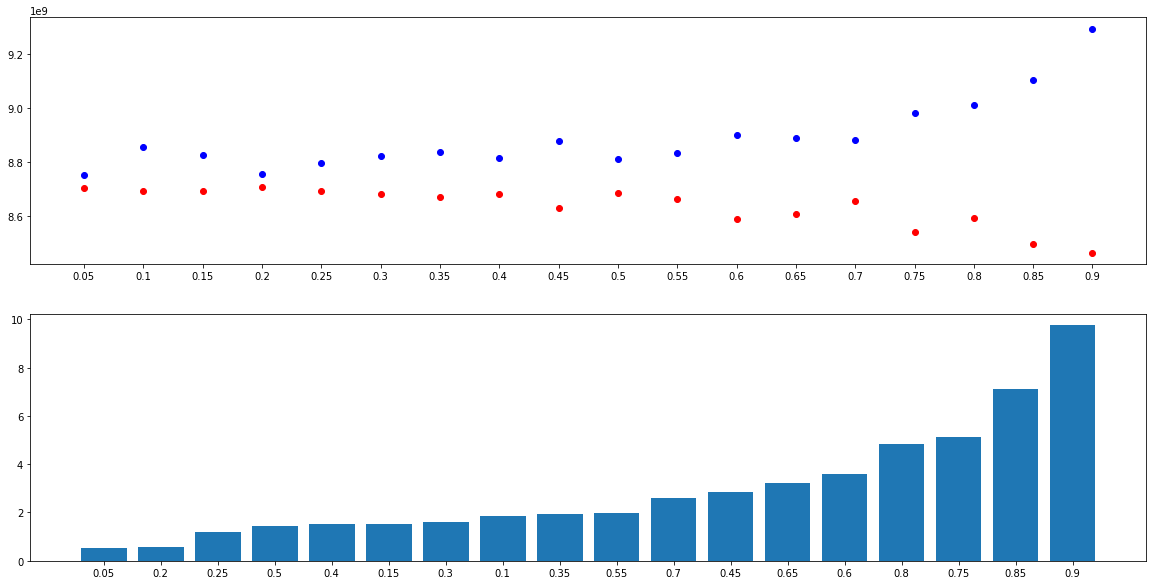

In [45]:
chart_train_test (predictors,target)

It seems like a test data set size of 20% is a good size for splitting our dataset. 

### Validation 
Now lets use our validation function to make sure that the results of our model hold up across different random iterations of train-test-split

In [46]:
display(mse_validation(predictors,target,0.2))

Scores
train_mean_squared_error 8,691,181,449.87
test_mean_squared_error  8,818,681,767.28
train_rmse                      93,225.52
test_rmse                       93,892.10
train_mean_vs_error                 19.78
test_mean_vs_error                  19.92
mean_r2                              0.82

Looks like our r2 holds up. RMSE to target mean ratio is a tad high.

## Second Trial
Let's see if we cant improve the performance of our model a little bit. To do so, let's revisit our data. 

In [47]:
print(phase2_take1.keys())

dict_keys(['categ_culled', 'contin_cull', 'contin_cull_thresh', 'cols_normed', 'colinear_columns', 'categ_cols', 'scaled_cols'])


### Preliminary Model
Recall that earlier, we decided not to normalize or scale the target feature, 'price'. In our second trial, lets start by just scaling the target and fitting a new model to see if there is any improvement. 

In [48]:
df2_2 = df1.copy()
df2_2 = df1.fillna(0)

phase2_take2 = phase2_take1.copy()
phase2_take2['scaled_cols'].append('price')

df2_2 = pre_process(df2_2,phase2_take2)

target2 = df2_2['price']
predictors2 = df2_2.drop('price',axis=1)

pred_int2 = sm.add_constant(predictors2)
model2 = sm.OLS(target2,pred_int2).fit()

display(model2.summary())

Rows Dropped: 3405    Rows Left: 18015   Percentage Remaining: 84.1
None


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     986.0
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:15:45   Log-Likelihood:                 21947.
No. Observations:               18015   AIC:                        -4.373e+04
Df Residuals:                   17931   BIC:                        -4.307e+04
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3725      0.010    -36.201      0.000      -0.393      -0.352
bedrooms         -0.0153      0.003     -4.979      0.000      -0.021      -0.009
bathrooms         0.0740      0.006     11.895      0.000       0.062       0.086
sqft_living       0.3890      0.009     41.866      0.000       0.371       0.407
sqft_lot          0.1150      0.006     19.558      0.000       0.103       0.127
floors            0.0050      0.004      1.219      0.223      -0.003       0.013
view              0.1340      0.004     34.731      0.000       0.126       0.142
condition         0.0677      0.004     18.175      0.000       0.060       0.075
grade             0.3673      0.008     44.012      0.000       0.351       0.384
sqft_basement    -0.0518      0.005    -11.194      0.000      -0.061      -0.043
yr_built         -0.0531      0.004    -14.444      0.000      -0.060      -0.046
lat               0.0271      0.020      1.336      0.182      -0.013       0.067
long             -0.0568      0.028     -2.008      0.045      -0.112      -0.001
sqft_living15     0.0781      0.006     12.638      0.000       0.066       0.090
98002             0.0234      0.007      3.446      0.001       0.010       0.037
98003            -0.0074      0.006     -1.210      0.226      -0.019       0.005
98004             0.4100      0.012     33.411      0.000       0.386       0.434
98005             0.2524      0.013     19.856      0.000       0.227       0.277
98006             0.2054      0.011     19.558      0.000       0.185       0.226
98007             0.1880      0.013     14.237      0.000       0.162       0.214
98008             0.1778      0.013     14.186      0.000       0.153       0.202
98010             0.0883      0.011      7.820      0.000       0.066       0.110
98011             0.0933      0.016      5.741      0.000       0.061       0.125
98014             0.0955      0.019      5.078      0.000       0.059       0.132
98019             0.0677      0.018      3.819      0.000       0.033       0.102
98022             0.0168      0.010      1.684      0.092      -0.003       0.036
98023            -0.0176      0.006     -3.105      0.002      -0.029      -0.006
98024             0.1109      0.018      6.218      0.000       0.076       0.146
98027             0.1641      0.011     15.044      0.000       0.143       0.185
98028             0.0820      0.016      5.199      0.000       0.051       0.113
98029             0.1820      0.012     14.974      0.000       0.158       0.206
98030             0.0048      0.007      0.715      0.475      -0.008       0.018
98031             0.0066      0.007      0.929      0.353      -0.007       0.021
98032            -0.0017      0.008     -0.205      0.837      -0.018       0.014
98033             0.2474      0.014     18.188   

Interesting. Looks like our R-squared values went up slightly. But so did skew and kurtosis. 

### Fitler out high p-values
Lets remove high p value features.

In [49]:
df2_2 = remove_pvals(model2,df2_2)

target2 = df2_2['price']
predictors2 = df2_2.drop('price',axis=1)

pred_int2 = sm.add_constant(predictors2)
model2 = sm.OLS(target2,pred_int2).fit()

display(model2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     1119.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:15:45   Log-Likelihood:                 21929.
No. Observations:               18015   AIC:                        -4.371e+04
Df Residuals:                   17941   BIC:                        -4.313e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3619      0.007    -53.524      0.000      -0.375      -0.349
bedrooms         -0.0157      0.003     -5.136      0.000      -0.022      -0.010
bathrooms         0.0759      0.006     12.468      0.000       0.064       0.088
sqft_living       0.3928      0.009     44.050      0.000       0.375       0.410
sqft_lot          0.1125      0.006     20.339      0.000       0.102       0.123
view              0.1358      0.004     35.481      0.000       0.128       0.143
condition         0.0677      0.004     18.215      0.000       0.060       0.075
grade             0.3662      0.008     43.955      0.000       0.350       0.383
sqft_basement    -0.0546      0.004    -13.615      0.000      -0.062      -0.047
yr_built         -0.0526      0.004    -14.669      0.000      -0.060      -0.046
long             -0.0536      0.017     -3.226      0.001      -0.086      -0.021
sqft_living15     0.0767      0.006     12.446      0.000       0.065       0.089
98002             0.0197      0.006      3.524      0.000       0.009       0.031
98004             0.4198      0.006     70.663      0.000       0.408       0.431
98005             0.2618      0.007     38.390      0.000       0.248       0.275
98006             0.2129      0.004     47.538      0.000       0.204       0.222
98007             0.1976      0.007     27.293      0.000       0.183       0.212
98008             0.1870      0.005     35.013      0.000       0.177       0.197
98010             0.0855      0.009      9.203      0.000       0.067       0.104
98011             0.1094      0.006     18.624      0.000       0.098       0.121
98014             0.1073      0.010     10.621      0.000       0.087       0.127
98019             0.0826      0.007     11.520      0.000       0.069       0.097
98023            -0.0208      0.004     -4.949      0.000      -0.029      -0.013
98024             0.1175      0.013      8.865      0.000       0.092       0.144
98027             0.1701      0.005     32.024      0.000       0.160       0.181
98028             0.0981      0.005     20.458      0.000       0.089       0.108
98029             0.1893      0.006     34.140      0.000       0.178       0.200
98033             0.2602      0.004     61.319      0.000       0.252       0.268
98034             0.1452      0.004     39.227      0.000       0.138       0.153
98038             0.0378      0.005      8.309      0.000       0.029       0.047
98039             0.5475      0.024     22.807      0.000       0.500       0.595
98040             0.3443      0.006     56.588      0.000       0.332       0.356
98042             0.0136      0.004      3.397      0.001       0.006       0.021
98045             0.0931      0.009     10.760      0.000       0.076       0.110
98052             0.1986      0.004     49.315   

### Validation
And now lets validate

In [50]:
display(mse_validation(predictors2,target2,0.2))

Scores
train_mean_squared_error    0.01
test_mean_squared_error     0.01
train_rmse                  0.07
test_rmse                   0.07
train_mean_vs_error        23.66
test_mean_vs_error         23.96
mean_r2                     0.82

Looks like the slightly higher r2 in our preliminary model was a statistical fluke. Controlling for randomnes in test set selection r2 stays the same. However, looks like mean error got significant worse, by alomst 4 percentage points. 

## Third Trial

In this trial lets normalize 'price' in addition to scaling it and see what happens. 

### Preliminary Model

In [51]:
phase2_take3 = phase2_take1.copy()
phase2_take3['scaled_cols'].append('price')
phase2_take3['cols_normed'].append('price')

df2_3 = df1.copy()
df2_3 = df1.fillna(0)

df2_3 = pre_process(df2_3,phase2_take3)

target3 = df2_3['price']
predictors3 = df2_3.drop('price',axis=1)

pred_int3 = sm.add_constant(predictors3)
model3 = sm.OLS(target3,pred_int3).fit()

display(model3.summary())

Rows Dropped: 3405    Rows Left: 18015   Percentage Remaining: 84.1
None


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1303.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:15:58   Log-Likelihood:                 25184.
No. Observations:               18015   AIC:                        -5.020e+04
Df Residuals:                   17931   BIC:                        -4.954e+04
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0851      0.009     -9.894      0.000      -0.102      -0.068
bedrooms         -0.0084      0.003     -3.278      0.001      -0.013      -0.003
bathrooms         0.0640      0.005     12.318      0.000       0.054       0.074
sqft_living       0.4091      0.008     52.688      0.000       0.394       0.424
sqft_lot          0.0847      0.005     17.244      0.000       0.075       0.094
floors           -0.0111      0.003     -3.199      0.001      -0.018      -0.004
view              0.0871      0.003     27.035      0.000       0.081       0.093
condition         0.0726      0.003     23.331      0.000       0.066       0.079
grade             0.2663      0.007     38.183      0.000       0.253       0.280
sqft_basement    -0.0617      0.004    -15.953      0.000      -0.069      -0.054
yr_built         -0.0195      0.003     -6.354      0.000      -0.026      -0.013
lat               0.0777      0.017      4.589      0.000       0.045       0.111
long             -0.1664      0.024     -7.038      0.000      -0.213      -0.120
sqft_living15     0.1112      0.005     21.530      0.000       0.101       0.121
98002             0.0075      0.006      1.315      0.188      -0.004       0.019
98003             0.0003      0.005      0.054      0.957      -0.010       0.010
98004             0.3431      0.010     33.468      0.000       0.323       0.363
98005             0.2436      0.011     22.941      0.000       0.223       0.264
98006             0.2103      0.009     23.959      0.000       0.193       0.227
98007             0.2057      0.011     18.651      0.000       0.184       0.227
98008             0.2086      0.010     19.921      0.000       0.188       0.229
98010             0.1255      0.009     13.299      0.000       0.107       0.144
98011             0.1114      0.014      8.196      0.000       0.085       0.138
98014             0.1243      0.016      7.912      0.000       0.093       0.155
98019             0.1009      0.015      6.817      0.000       0.072       0.130
98022             0.0602      0.008      7.235      0.000       0.044       0.077
98023            -0.0210      0.005     -4.426      0.000      -0.030      -0.012
98024             0.1636      0.015     10.980      0.000       0.134       0.193
98027             0.2016      0.009     22.130      0.000       0.184       0.220
98028             0.0928      0.013      7.043      0.000       0.067       0.119
98029             0.2219      0.010     21.847      0.000       0.202       0.242
98030             0.0209      0.006      3.685      0.000       0.010       0.032
98031             0.0233      0.006      3.927      0.000       0.012       0.035
98032            -0.0153      0.007     -2.253      0.024      -0.029      -0.002
98033             0.2340      0.011     20.589   

Looks like scaling and normalizing price brings up our R-squared by quite a bit!, JB, Kurtosis and skew came down significantly as well. 

### Filter out high p-values

In [52]:
df2_3 = remove_pvals(model3,df2_3)

target3 = df2_3['price']
predictors3 = df2_3.drop('price',axis=1)

pred_int3 = sm.add_constant(predictors3)
model3 = sm.OLS(target3,pred_int3).fit()

display(model3.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1369.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:15:58   Log-Likelihood:                 25182.
No. Observations:               18015   AIC:                        -5.020e+04
Df Residuals:                   17935   BIC:                        -4.958e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0836      0.008    -10.658      0.000      -0.099      -0.068
bedrooms         -0.0084      0.003     -3.286      0.001      -0.013      -0.003
bathrooms         0.0640      0.005     12.314      0.000       0.054       0.074
sqft_living       0.4094      0.008     52.778      0.000       0.394       0.425
sqft_lot          0.0841      0.005     17.191      0.000       0.074       0.094
floors           -0.0112      0.003     -3.241      0.001      -0.018      -0.004
view              0.0875      0.003     27.239      0.000       0.081       0.094
condition         0.0728      0.003     23.438      0.000       0.067       0.079
grade             0.2662      0.007     38.217      0.000       0.253       0.280
sqft_basement    -0.0618      0.004    -16.010      0.000      -0.069      -0.054
yr_built         -0.0197      0.003     -6.417      0.000      -0.026      -0.014
lat               0.0826      0.011      7.202      0.000       0.060       0.105
long             -0.1622      0.022     -7.296      0.000      -0.206      -0.119
sqft_living15     0.1109      0.005     21.490      0.000       0.101       0.121
98004             0.3375      0.007     46.642      0.000       0.323       0.352
98005             0.2379      0.008     30.134      0.000       0.222       0.253
98006             0.2048      0.006     33.199      0.000       0.193       0.217
98007             0.1999      0.008     23.906      0.000       0.183       0.216
98008             0.2025      0.008     26.858      0.000       0.188       0.217
98010             0.1215      0.009     13.621      0.000       0.104       0.139
98011             0.1046      0.009     11.350      0.000       0.087       0.123
98014             0.1169      0.013      8.843      0.000       0.091       0.143
98019             0.0935      0.011      8.246      0.000       0.071       0.116
98022             0.0570      0.008      7.546      0.000       0.042       0.072
98023            -0.0237      0.004     -6.236      0.000      -0.031      -0.016
98024             0.1574      0.013     11.668      0.000       0.131       0.184
98027             0.1961      0.007     27.503      0.000       0.182       0.210
98028             0.0862      0.009     10.115      0.000       0.069       0.103
98029             0.2159      0.008     26.910      0.000       0.200       0.232
98030             0.0171      0.005      3.655      0.000       0.008       0.026
98031             0.0193      0.005      4.115      0.000       0.010       0.028
98032            -0.0189      0.006     -3.192      0.001      -0.031      -0.007
98033             0.2277      0.007     30.424      0.000       0.213       0.242
98034             0.1392      0.008     17.880      0.000       0.124       0.154
98038             0.0774      0.006     13.521   

### Valiation

In [53]:
display(mse_validation(predictors3,target3,0.2))

Scores
train_mean_squared_error    0.00
test_mean_squared_error     0.00
train_rmse                  0.06
test_rmse                   0.06
train_mean_vs_error        10.12
test_mean_vs_error         10.20
mean_r2                     0.86

Wow! that seemed to have made quite a difference! Rsquared has indeed gone up from 8.2 to 8.6. And there is a huge improvement in mean squared error. It seems to have gone down by half from our first model. 


## Fourth Trial

In this trial, lets remove some additional features from our final model. Lets take out the features with the highest p-values, even if they happen to be less than 0.05. 

### Preliminary Model

In [54]:
series = model3.pvalues
series = series.sort_values(ascending = False)
series2 = series.head(7)
high_pvals = list(series2.index)
display(high_pvals)

[98188, 98148, 98092, 98032, 'floors', 'bedrooms', 98030]

In [55]:
df2_4 = df2_3.drop(high_pvals,axis=1)

target4 = df2_4['price']
predictors4 = df2_4.drop('price',axis=1)

pred_int4 = sm.add_constant(predictors4)
model4 = sm.OLS(target4,pred_int4).fit()

display(model4.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1497.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:16:10   Log-Likelihood:                 25150.
No. Observations:               18015   AIC:                        -5.015e+04
Df Residuals:                   17942   BIC:                        -4.958e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0924      0.008    -12.125      0.000      -0.107      -0.077
bathrooms         0.0594      0.005     11.745      0.000       0.050       0.069
sqft_living       0.3930      0.007     57.383      0.000       0.380       0.406
sqft_lot          0.0881      0.005     18.979      0.000       0.079       0.097
view              0.0875      0.003     27.260      0.000       0.081       0.094
condition         0.0726      0.003     23.397      0.000       0.067       0.079
grade             0.2671      0.007     38.483      0.000       0.254       0.281
sqft_basement    -0.0555      0.003    -16.597      0.000      -0.062      -0.049
yr_built         -0.0211      0.003     -7.046      0.000      -0.027      -0.015
lat               0.0907      0.011      8.445      0.000       0.070       0.112
long             -0.1206      0.019     -6.275      0.000      -0.158      -0.083
sqft_living15     0.1136      0.005     22.088      0.000       0.104       0.124
98004             0.3281      0.007     48.272      0.000       0.315       0.341
98005             0.2279      0.007     30.628      0.000       0.213       0.242
98006             0.1942      0.006     34.655      0.000       0.183       0.205
98007             0.1885      0.008     23.934      0.000       0.173       0.204
98008             0.1906      0.007     27.554      0.000       0.177       0.204
98010             0.1090      0.008     13.150      0.000       0.093       0.125
98011             0.0936      0.009     10.845      0.000       0.077       0.111
98014             0.0938      0.012      7.749      0.000       0.070       0.118
98019             0.0737      0.010      7.086      0.000       0.053       0.094
98022             0.0461      0.007      6.971      0.000       0.033       0.059
98023            -0.0232      0.004     -6.170      0.000      -0.031      -0.016
98024             0.1381      0.013     10.832      0.000       0.113       0.163
98027             0.1822      0.006     28.707      0.000       0.170       0.195
98028             0.0764      0.008      9.630      0.000       0.061       0.092
98029             0.2001      0.007     28.095      0.000       0.186       0.214
98031             0.0120      0.004      2.778      0.005       0.004       0.020
98033             0.2170      0.007     31.432      0.000       0.203       0.231
98034             0.1288      0.007     17.958      0.000       0.115       0.143
98038             0.0651      0.005     13.711      0.000       0.056       0.074
98039             0.3845      0.021     18.637      0.000       0.344       0.425
98040             0.2643      0.006     42.197      0.000       0.252       0.277
98042             0.0216      0.004      5.619      0.000       0.014       0.029
98045             0.1355      0.010     13.658   

### Validation

In [56]:
display(mse_validation(predictors3,target3,0.2))

Scores
train_mean_squared_error    0.00
test_mean_squared_error     0.00
train_rmse                  0.06
test_rmse                   0.06
train_mean_vs_error        10.11
test_mean_vs_error         10.22
mean_r2                     0.86

Hmm. No difference. Looks like Model 3 is as good as it gets

## Final Model Selection

It seems that scaling and normalizing our target variable has the best effect on our model. Lets choose moel 3 as our final model and pickle it so it can be easily retrieved without having to retrain the model. 

In [57]:
import pickle

model = model3

with open('model.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)


# INTERPRET

## Explanation of Final Model.¶

Our final model has an r-squared value of .85. This means that 85 percent of the variation above the mean price can be explained by our model, which is pretty decent for a regression model.

Our root mean error is within 10% of the mean of the actual price. This means that our predictions are on average within 10% of the actual price

## QUESTION 3: Which features have the greatest effect on price?

To answer this question, lets examine the coefficients from our updated model.

The following function returns a chart that shows us the magnitude of the coefficients for each feature stacked in order. A red bar indicates negative correlation, while a green bar indicates positive correlation. This way we can observe and assess the relative impact of each feature. We will use the OLS model. 

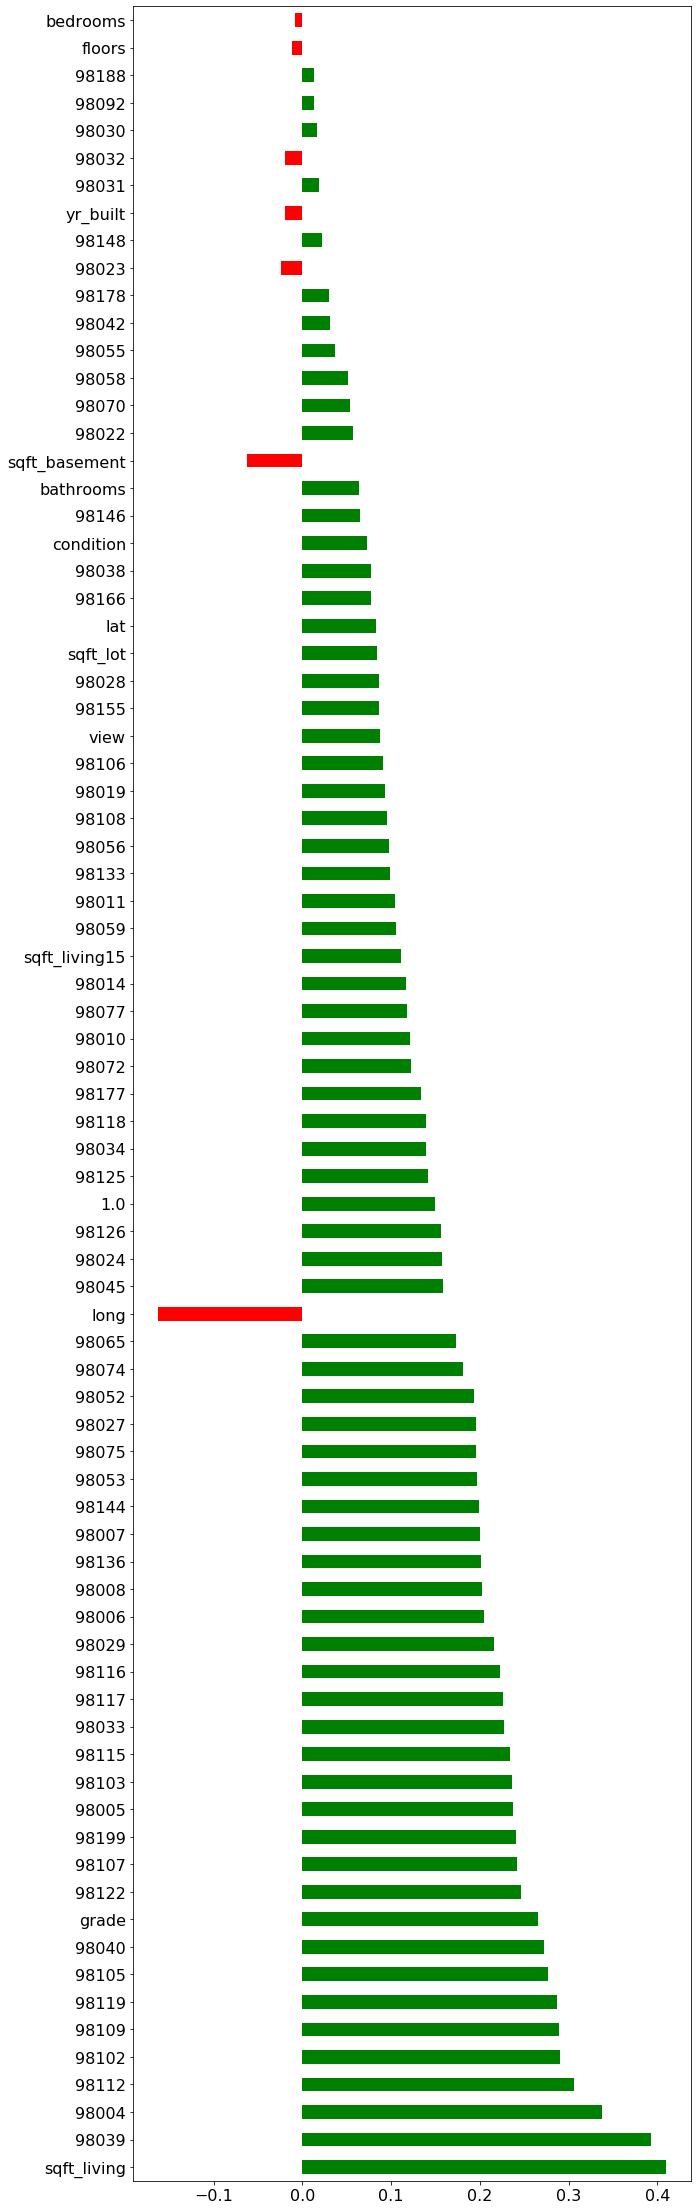

In [58]:
mpl.rcParams['figure.figsize'] = (10.0,40.0)
def coef_charts (model):
    
    main_features = model.params.to_frame()
    main_features.rename(columns={0:'coeffs'},inplace=True)
    main_features = main_features.sort_values('coeffs',ascending = False)
    main_features.drop('const',axis=0,inplace=True)     

    main_features['magnitude'] = abs(main_features['coeffs'])
    main_features['positive'] = main_features['coeffs'] < 0

    main_features.sort_values('magnitude',ascending=False,inplace=True)
    
    fig, ax = plt.subplots()
    #fig.figsize=(10.0,40.0)
    
    main_features['coeffs'].plot(kind='barh',color=main_features.positive.map({True: 'r', False: 'g'}),figure=fig,fontsize=16)
   
coef_charts(model)

mpl.rcParams['figure.figsize'] = (40.0,10.0)
plt.savefig('plot_images/coeff_chart')
   

From this chart we can see that square footage of living space has the most impact on price. This seems in line with what we know about the fundamental mechanics of the real estate market. People are buying a place to live and the more living space per dollar they can get the higher they will be willing to pay.

After that we see that the zipcode of a house makes a big difference. Being in 98039 means the price is more likely to be high, which makes sense given what know about 98039 i.e. its an expensive neighborhood where super rich people like Bill Gates and Jeff Bezos have homes. The next most significant features are all zipcodes that are close to the city center, as well as Mercer Island (98040), which again is in line with what we saw earlier. 

This chart is a little busy. Lets chart just the co-efficients of our original features

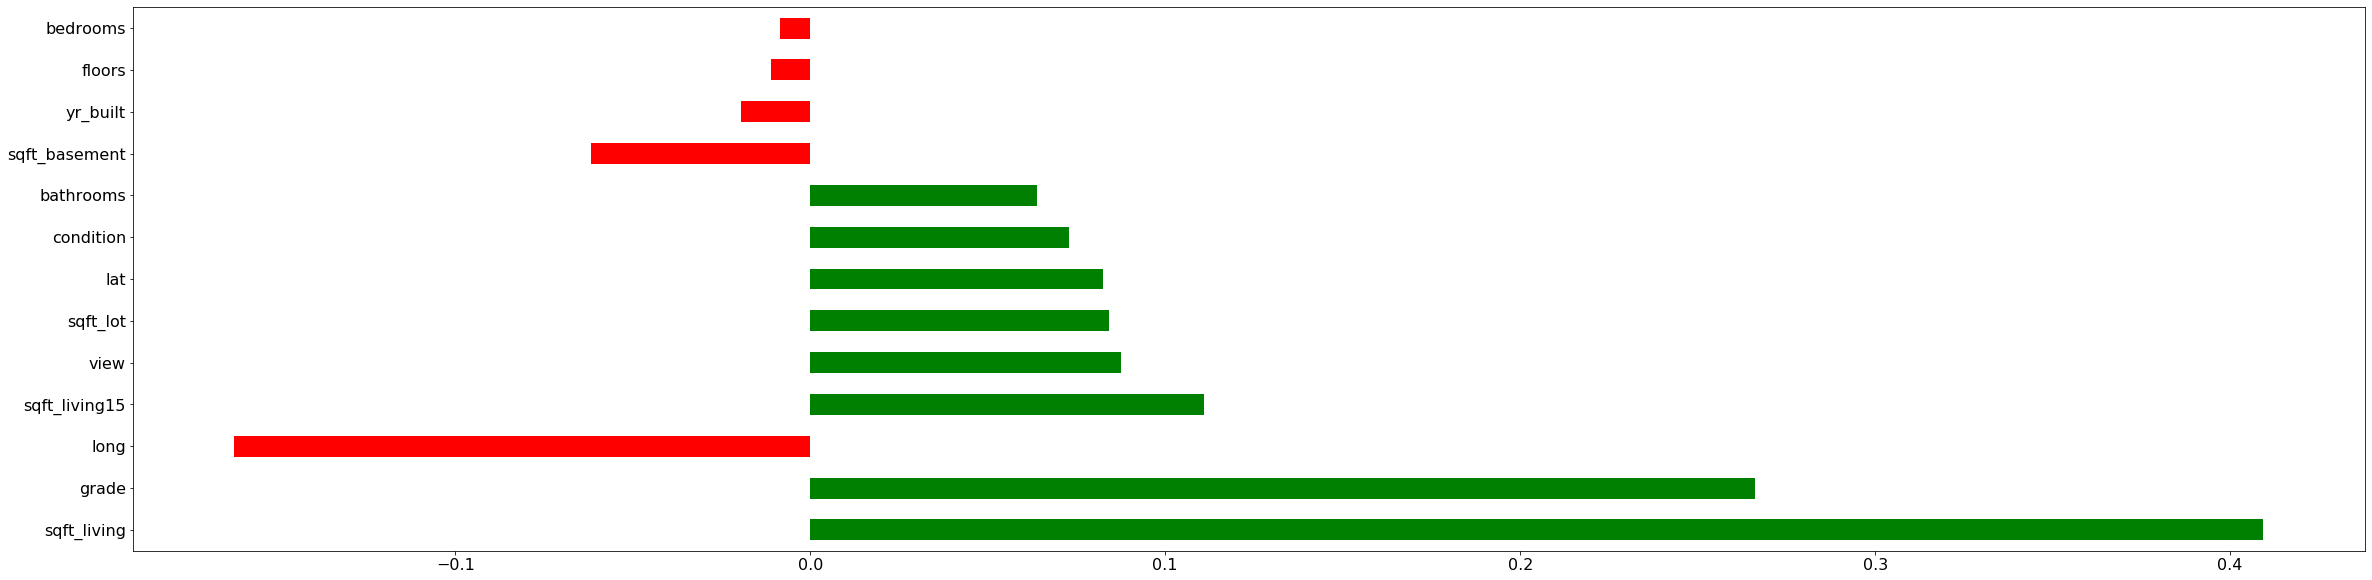

In [60]:
main_features = model.params.to_frame()
main_features.rename(columns={0:'coeffs'},inplace=True)
#main_features = main_features.sort_index()
main_features.drop('const',axis=0,inplace=True)   

set1 = set(list(main_features.index))
set2 = set(list(df0.columns))
common = list(set1 & set2)

main_features['magnitude'] = abs(main_features['coeffs'])
main_features['positive'] = main_features['coeffs'] < 0

fig, ax = plt.subplots()

main_features = main_features.loc[common,:]
main_features.sort_values('magnitude',ascending=False,inplace=True)

main_features['coeffs'].plot(kind='barh',color=main_features.positive.map({True: 'r', False: 'g'}),figure=fig,fontsize=16)
plt.savefig('plot_images/orig_coeff_chart')

Of all our original features, Grade is the second most important feature, which makes sense because the grade system is probably meant to reflect the value of the house and is essentially an analogue version of our linear regression model.

We see that longitude has a strong negative correlation with price. This makes sense based on what we saw when we were exploring maps of our data; prices are higher closer to the city. Recall that longitude decreases as we move west, and the Seattle city center is on the western edge of King county. 

We also see that there is a slight inverse relationship between the year the house was built and the price. This might seem counter intuitive, but it makes sense if we consider that houses built closer to the city were built first and their proximity to the city makes them more valuable. Whereas the suburbs were built later, and in areas where land is more abundant and thus cheaper. 


# CONCLUSIONS & RECOMMENDATIONS

Based on our analysis we can make the following conclusions:

Sellers looking to make profits from investing in property are probably better off buying houses towards the city center, and in neighborhood like Medina and Mercer Island. These have higher sales prices and thus, probably yield higher profits. Also, buying closer to the city would probably lead to more incrases in price, since the scarcity will only increase. 

Buyers are better off buying in the suburubs, especially if they want maximum living space for their money. They have options to choose between bigger houses or smaller yards; they can buy the zipcode that fits their needs. 
